# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short

# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

# uipath = unicode(ipath , "utf8")
uipath = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


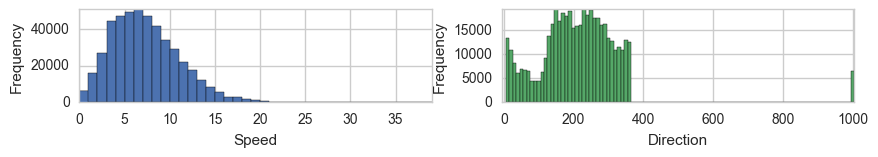

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.703340e+05  470334.000000  470334.000000  470334.000000   
mean   2.000300e+07    1153.105529     205.386744       7.283531   
std    1.127487e+05     669.378092     128.859325       3.840740   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.990101e+07     600.000000     130.000000       4.600000   
50%    2.002061e+07    1120.000000     200.000000       6.700000   
75%    2.011052e+07    1700.000000     270.000000       9.800000   
max    2.015123e+07    2350.000000     999.000000      38.600000   

               month   dir_windrose  
count  470334.000000  470334.000000  
mean        6.562462     205.010760  
std         3.449571     133.522418  
min         1.000000       0.000000  
25%         4.000000     140.000000  
50%         7.000000     200.000000  
75%        10.000000     270.000000  
max        12.000000     999.000000

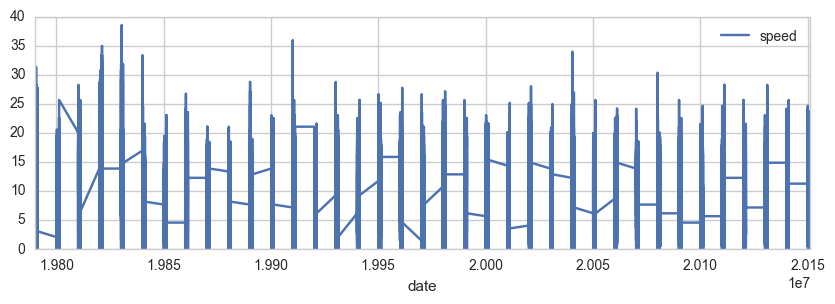

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


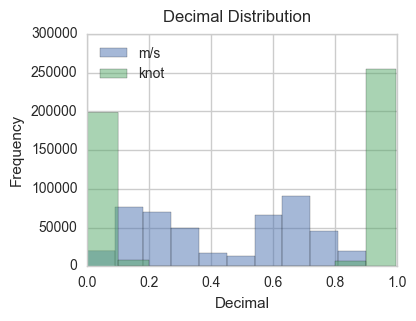

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

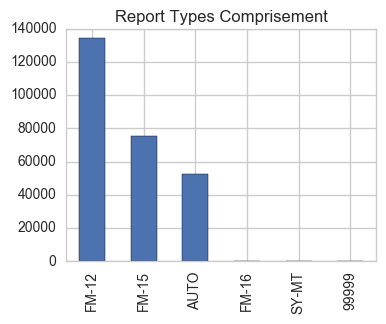

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

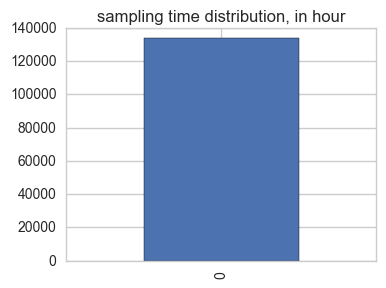

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       12808
100     12822
200     12815
300     12886
400     12847
500     12821
600     12879
700     12630
800     12191
900     11708
1000    11228
1100    11225
1200    11571
1300    11792
1400    12068
1500    12481
1600    12625
1700    12713
1800    12844
1900    12798
2000    12803
2100    12909
2200    12834
2300    12834
Name: HrMn, dtype: int64

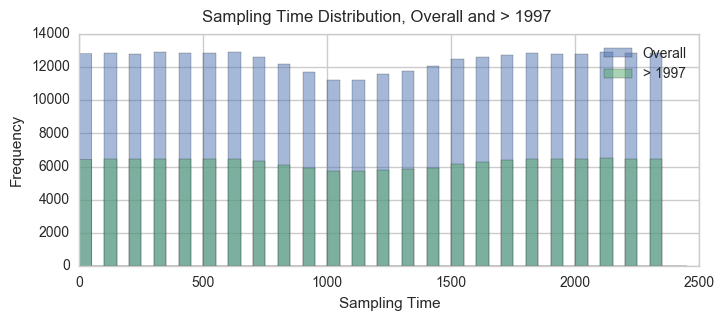

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
120455  19910103   600  FM-12  200     70         N      1           250   
253470  20040421  1100  FM-12  290     66         N      4           160   
44291   19831018  1400  FM-12  210     61         N     10           240   
3032    19790509   100  FM-12  140     61         N      5           310   
97226   19890213  1500  FM-12  160     56         N      2           290   
146657  19930121  2100  FM-12  180     56         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
3702    19790606   400  FM-12  250     55         N      6           200   
18751   19810227   400  FM-12  320     55         N      2           130   
146499  19930117   500  FM-12  180     55         N      1           270   

         decimal  incre  incre_reverse  
120455  0.978420   44.0           46.0  
253470  0.090730   33.0           32.0  
44291   0.036733   31.0           24.0  
3032    0.036733   45.0           48.0  
97226   0.982736    6.0            6.0  
146657  0.982736    8.0            6.0  
367283  0.010814    3.0            6.0  
3702    0.010814   49.0           48.0  
18751   0.010814   19.0           22.0  
146499  0.010814   12.0            3.0

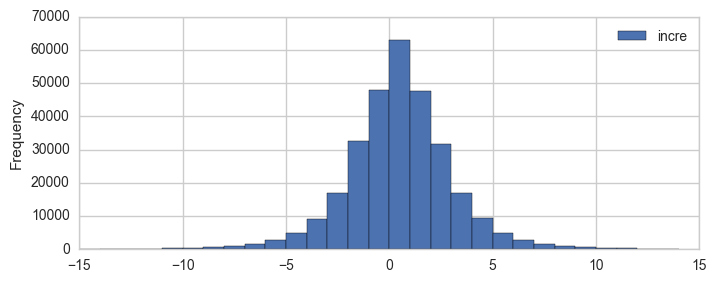

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 22


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
146657  19930121  2100  FM-12  180     56         N      1           270   
97226   19890213  1500  FM-12  160     56         N      2           290   
146499  19930117   500  FM-12  180     55         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
18751   19810227   400  FM-12  320     55         N      2           130   
47032   19840121  1900  FM-12  310     54         N      1           140   
8326    19791217   100  FM-12  210     54         N     12           240   
367281  20111208  1200  FM-12  190     54         N     12           260   
8325    19791217     0  FM-12  210     53         N     12           240   
292545  20080109   500  FM-12  170     53         N      1           280   

         decimal  incre  incre_reverse  
146657  0.982736    8.0            6.0  
97226   0.982736    6.0            6.0  
146499  0.010814   12.0            3.0  
367283  0.010814    3.0            6.0  
18751   0.010814   19.0           22.0  
47032   0.038891    4.0            2.0  
8326    0.038891    1.0            2.0  
367281  0.038891    2.0            2.0  
8325    0.066969    1.0           -1.0  
292545  0.872584   13.0           15.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       2844
10      2774
20      4149
30      4400
40      4500
50      3914
60      5092
70      6598
80      8572
90      8342
100     8554
110     7151
120     7541
130     6931
140     7978
150     8396
160    10301
170    10061
180    10951
190    11003
200    12180
210    11258
220    12002
230    10130
240    10149
250     9770
260    11952
270    11010
280    11943
290    10906
300    12159
310    10136
320     8728
330     5788
340     4119
350     2792
999     4033
Name: dir, dtype: int64

36 10.0


In [17]:
df=realign_direction(df, effective_column)

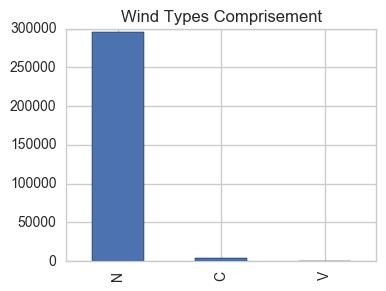

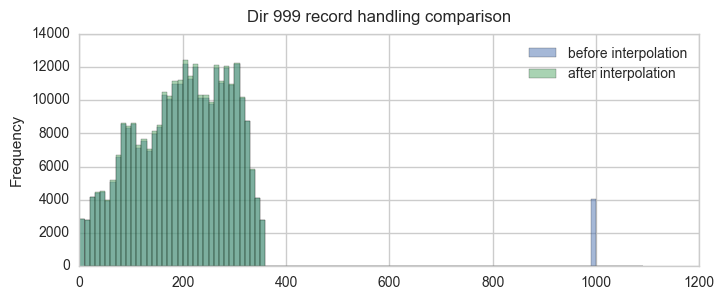

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

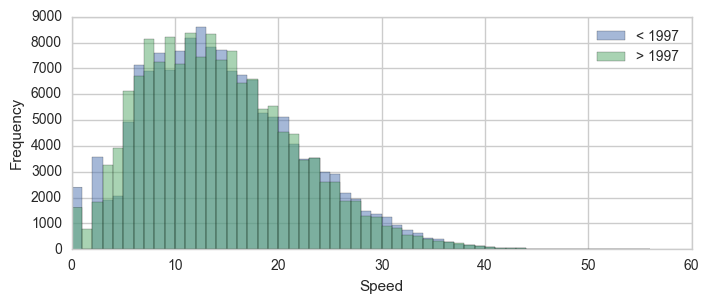

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

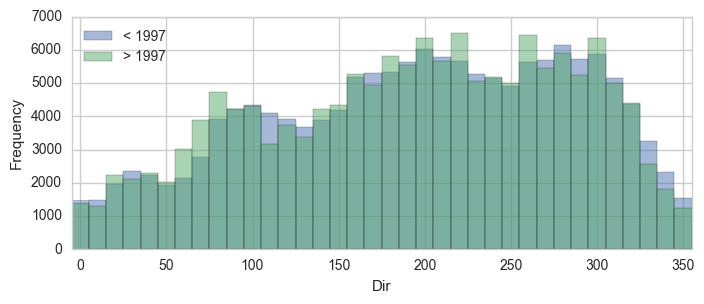

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1979 - 1979


D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


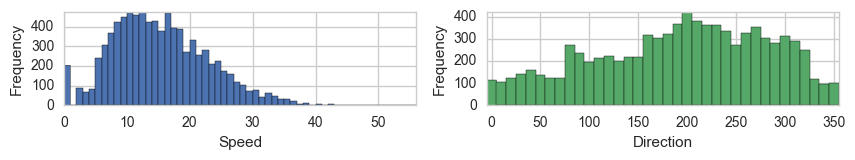

1980 - 1984


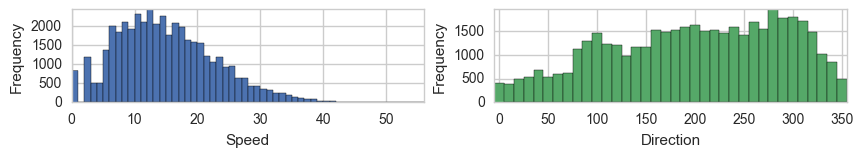

1985 - 1989


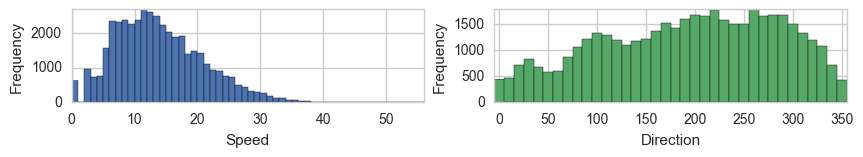

1990 - 1994


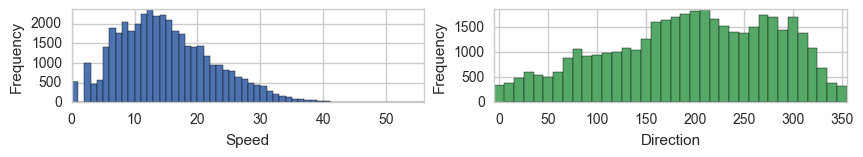

1995 - 1999


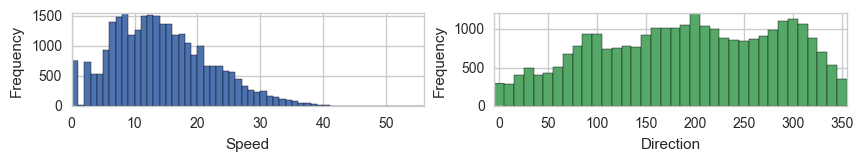

2000 - 2004


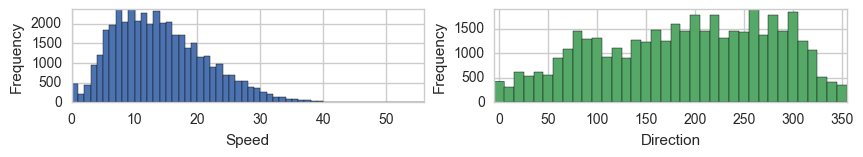

2005 - 2009


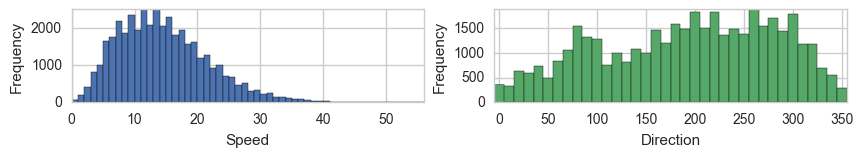

2010 - 2014


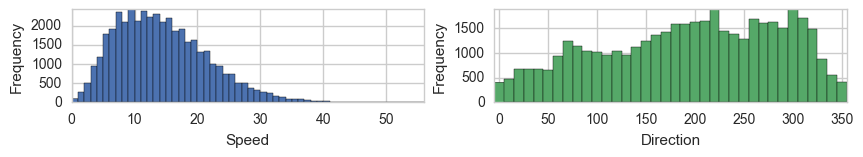

2015 - 2015


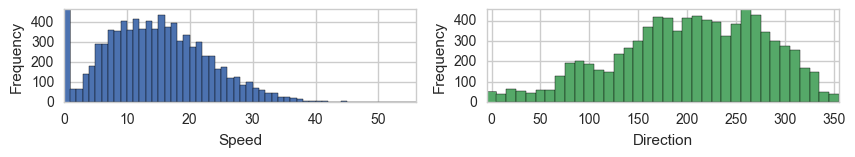

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00669354143313


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

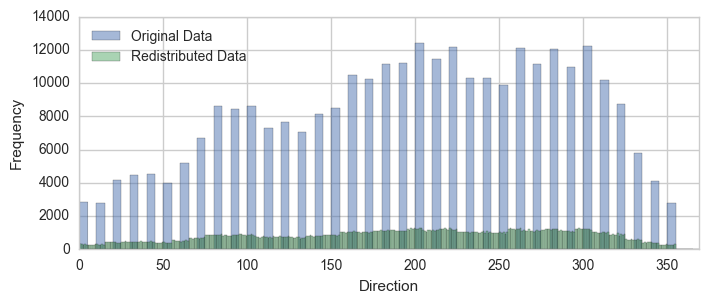

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


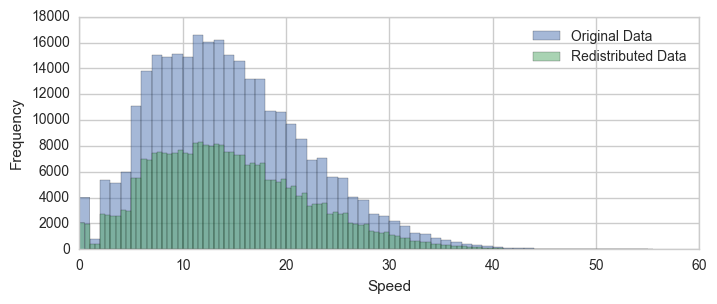

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Incre_threshold for artefact detection:', incre_threshold) 
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('delete_zero?', delete_zero)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.675782     14.400919      6.518150   
std    1.413668e+04    693.172819     90.978195      7.307572      3.459189   
min    2.010010e+07      0.000000     -4.999005      0.009125      1.000000   
25%    2.011040e+07    500.000000    122.715031      8.808805      4.000000   
50%    2.012070e+07   1100.000000    202.463359     13.501166      7.000000   
75%    2.013100e+07   1800.000000    270.764426     18.988192     10.000000   
max    2.014123e+07   2300.000000    354.973676     55.829053     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  42837.000000  42837.000000  42837.000000   42837.000000  42837.000000   
mean     191.330789      0.546484      0.000280      -0.000303     -2.266465   
std      102.782601      0.450140      2.535876       2.535862     10.601765   
min        0.000000      0.000000    -23.000000     -29.000000    -55.714559   
25%      130.000000      0.051839     -1.000000      -1.000000     -9.363347   
50%      200.000000      0.911451      0.000000       0.000000     -2.164251   
75%      270.000000      0.967607      1.000000       1.000000      5.021818   
max      999.000000      0.997842     29.000000      23.000000     36.639537   

                  y  
count  42837.000000  
mean      -2.884096  
std       11.616338  
min      -48.971767  
25%      -11.016764  
50%       -3.085500  
75%        5.531602  
max       37.846310

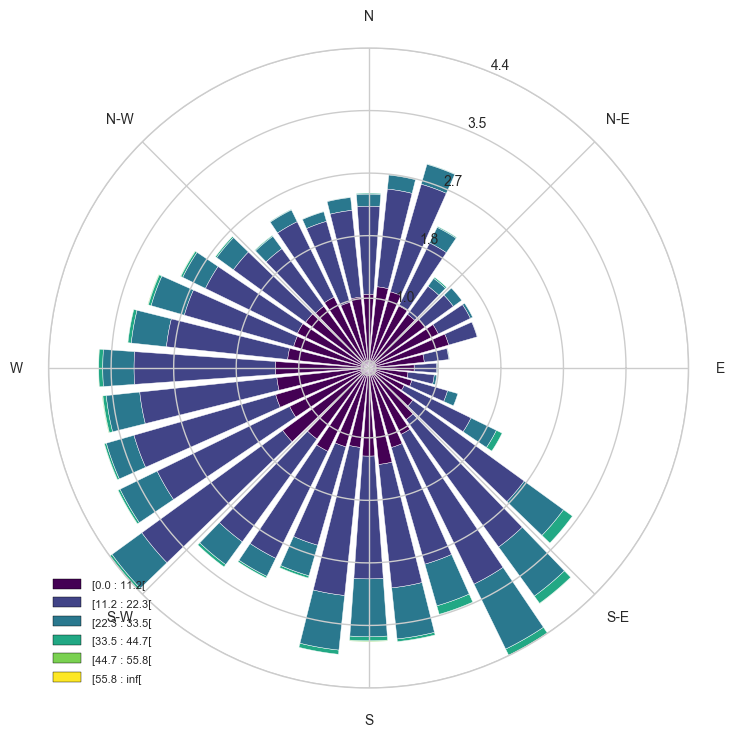

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYsAAAEwCAYAAABG7V09AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3Xtc1FX++PEXMDADgmKIiHjBSwqJgSCWhVmmmWVhW+j2
223NNK1s193KzMs3cy3UMnfdrCzWqHS1NdfVyjSzzSwzBeUWiCJKXkAuCooyzAAzvz9GRseBGK6f
meH9fDx8MJ8zZz6f92Fw3nM+5/M5x8VoNBoRQgghfoWr0gEIIYSwf5IshBBCNEiShRBCiAZJshBC
CNEgSRZCCCEaJMlCCCFEgyRZCCGEaJAkCyGEEA2SZCGEEKJBdpEs9Ho98+bNIzo6mhEjRpCYmFhv
3aysLCZOnEhERARxcXFkZmZaPL9jxw7Gjh3LkCFDmDp1Kvn5+a0dvhBCOD27SBbLli0jKyuLtWvX
snDhQlatWsXOnTut6mm1WqZPn050dDSbN28mIiKCGTNmUFlZCcChQ4d44YUXmDZtGv/9739xd3fn
ueeea+vmCCGE01E8WWi1WjZt2sSCBQsICQlh9OjRTJs2jXXr1lnV3bZtG56ensyePZu+ffsyf/58
OnTowI4dOwBITEwkNjaWuLg4goODWbBgAcXFxZSVlbV1s4QQwqkoniyys7OpqakhIiLCXBYVFUV6
erpV3fT0dKKioizKIiMjSUlJAeDAgQOMGTPG/FyPHj345ptv8PX1baXohRCifVA8WRQXF+Pr64tK
pTKX+fn5odPpKC0ttahbVFRE165dLcr8/PwoLCykvLycCxcuUF1dzdSpU4mJieGZZ56hsLCwTdoh
hBDOTPFkodVq8fDwsCir3dbr9RbllZWVddbV6/VUVFQA8NprrzFhwgRWr16NXq/nqaeeasXohRCi
fVA1XKV1qdVqq6RQu+3p6WlTXY1Gg5ubGwBxcXE88MADACxfvpzbb7+d1NRUi9Nc9amurubChQuo
1WpcXRXPo0II0WwGgwGdTkenTp0szuA0luLJIiAggLKyMgwGg/kDuqSkBI1GQ8eOHa3qFhcXW5SV
lJTg7+9P586dUalU9OnTx/ycr68vvr6+FBQU2JQsLly4QF5eXvMbJYQQdiY4OBg/P78mv17xZBEa
GopKpSI1NZXIyEgAkpOTCQsLs6obHh5OQkKCRdmhQ4d45plncHNzIywsjOzsbMaNGwfA+fPnKS0t
JSgoyKZY1Go1AF26dMHb27s5zVKcTqejoKCAwMBAc7scmbTHfjlTW8D52nPp0iVKSkqa3RbFk4VG
oyE2NpaFCxcSHx9PYWEhiYmJLF26FDD1HHx8fFCr1YwdO5YVK1YQHx/PpEmT2LBhA1qtlnvvvReA
KVOmMHfuXEJDQ7nxxht54403uOmmm7j55pttiqW2Z+Pt7d2sDGwPKioqKCgowNfXFy8vL6XDaTZp
j/1ypraA87UHTJ+jzT21bhcn5ufOnUtYWBiTJ09m8eLFzJo1i9GjRwMQExPD9u3bAdOH+OrVq0lO
Tubhhx8mIyODhIQENBoNAGPHjmXu3Lm8/vrrPPLIIwC8/fbbyjRKCCGciOI9CzD1LpYsWcKSJUus
nsvOzrbYHjx4MJs3b653X3FxccTFxbV4jEII0Z7ZRc9CCCGEfZNkIYQQokGSLIQQQjRIkoUQQogG
SbIQQgjRIEkWQgghGiTJQgghRIPs4j4L0Xx6vZ60tDTzdmVlJe7u7gpGJIRwJpIsnERaWhrDhmUC
g66U5PLRR642T3UihBC/RpKFUxkERF+zfVipQIQQTkbGLIQQQjRIehbtzPVjG2Ca+v36FQiFEOJa
kizaGeuxjUwOHIDo6Ohfe5kQop2TZNEuXT+2IYQQv07GLIQQQjRIehZ27voxBhlfEEIoQZKFnbMc
Y2jh8YUOheBzlDMVHehT0YcbPG/A1UU6m0IIa5IsHELLjTHkV+TDiB0QMhOCkgB4aDewG7p5d+OJ
iCd4MupJgn2DW+R4QgjnIF8j2wmD0cA/9v+DSXsmwd2rzYniWmcvnSX+h3j6ruzLo/95lPPa8wpE
KoSwR9KzaAdOXjjJ41se59u8b00FBlc4GQNHHoSznrz5j0o6B3Vmc/Zmvsz5EoPRwCc/f8Lek3tZ
cNMChtwwBJDxEiHaM0kWTi6vLI8xn4whvzwfgBt9biRn2SIoevRKjSRGBED0kGimDJnCyQsn+et3
f2VNyhpOXTzFjB+fgq//BPsi5H4MIdoxOQ3lxMqqyxi/cbw5UcyLmceHt38IRf3rfU2vTr3454P/
ZOMjG/FWeYOrEcauhOGpbRS1EMIeSbJwVp5lvH72dU5cOAHAintW8Nrdr+Huatu05XGD4lgbsxbO
B5kKxq5k0y+bWitaIYSdk2ThjFwMEDefM1VnAHj5jpf5y/C/NHo3QV5B8NE7cKEnAK9nvs7HaR+3
aKhCCMcgycIZRb8NfU1XO80YMoNX7nyl6fu6EAgf/Q/KuwAw/fPppBSktECQQghHIsnC2XTJhjEv
AtDLoxdL71qKi4tLgy/T6/UkJSWZ/+n1+qtPnu8P61aidlWjq9ER92kcFyovtFYLhBB2SJKFM3Gt
hgmTwb0Sqt150v9JPNxsu9S19k7xYcNg2LBMq2nMKbyRFweZklBuaS5TP5uK0Whs6RYIIeyUXSQL
vV7PvHnziI6OZsSIESQmJtZbNysri4kTJxIREUFcXByZmZkWzw8dOpTQ0FBCQkIICQkhNDQUrVbb
2k2wD8P/BT0OmB5/O4NeHr0auYPaO8UH1fnsAz0f4PGIxwH4z+H/8G7yu02NVAjhYOwiWSxbtoys
rCzWrl3LwoULWbVqFTt37rSqp9VqmT59OtHR0WzevJmIiAhmzJhBZWUlAIWFhVy+fJldu3axd+9e
9u7dyw8//ICnp2dbN6nNlenL4I4PTRunhsOPv2uV47x939sM8jclkzm75nDqwqlWOY4Qwr4oniy0
Wi2bNm1iwYIFhISEMHr0aKZNm8a6deus6m7btg1PT09mz55N3759mT9/Ph06dGDHjh0AHD9+HH9/
f4KCgvDz8zP/aw8+OPYBqC+bNravBKNbqxzHy92LjyZ8hKuLK5f0l5j55Ux0Op3FeIfVmIcQwuEp
niyys7OpqakhIiLCXBYVFUV6erpV3fT0dKKioizKIiMjSUkxXZ1z7NgxgoODWzVee3Si9MTVeyAy
4yC/de+yjuoexZ9v+TMAnx/9nL999bdrxjvqGfMQQjg0xZNFcXExvr6+qFRXZx7x8/NDp9NRWlpq
UbeoqIiuXbtalPn5+VFYWAhAbm4uWq2Wxx57jJiYGKZPn05eXl6rt0FpC75dQLWxGmrc4JvX2uSY
i+5aRO9OvQFYnrUcNL0wjXfUP+YhhHBciicLrVZrNTld7fb1pzIqKyvrrFtb7/jx41y8eJGZM2fy
7rvvotFoePzxx6moqGjFFigrpSCF9RnrTRsHH4LzN7bJcb09vHnn/ncAOKc7B3cmtMlxhRDKUHwi
QbVabZUUarevH5iur65GowFgzZo1VFdXm1+3fPlyRo4cybfffsv9999vc0w6nc5uEoxp8F5jsX1t
bK9+9yoAnm6eaL+bavX6668Eu35/V8uwOk5dZdce+86gO5kwYAJbjm6B6E2w/1Uo7Vdn3eaqbYez
XNnmTO1xpraA87VHp9O1yH4UTxYBAQGUlZVhMBhwdTV1dEpKStBoNHTs2NGqbnFxsUVZSUkJ/v7+
ALi7u+PufnXuIw8PD3r06GE+TWWrgoICCgoKmtKcFnfixAkg1GLby8sLgDMVZ9hyZAsAIzuMZMdl
68H860/DXb+/q2VYHaeustpj15ocNJnPj35OjVs1jJ4Ln26st25LcLbTis7UHmdqCzhfe5pL8WQR
GhqKSqUiNTW

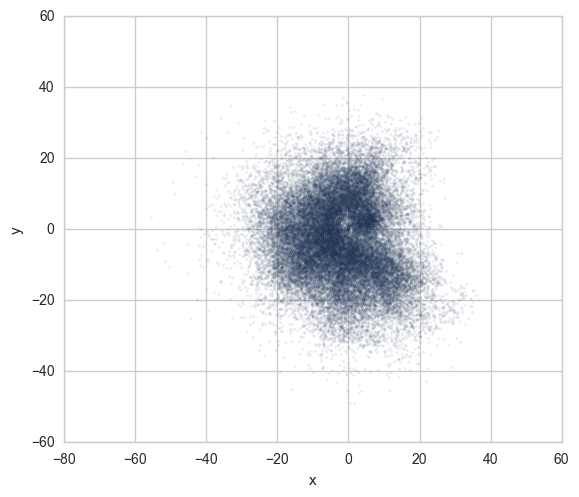

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview by Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
        plt_configure(figsize=(3,3), title=title)
        # fig,ax = plt.subplots(figsize=(3,3))
        # sub_df['speed'].hist(bins=arange(0,sub_df.speed.max()))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAScAAAEvCAYAAAAHCQcsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXecXGXZ//+emZ2203d3tveSLSkkQAIYMIogVRSkyhf1
Bw9EiiiKBVEJioCCoI8gIhBRRB669KKEJiUJLW2zPdt3dnbqTq/n98c6h2x2k+wme2ZL5v16zQsy
c++cc2bu+Zzrvu6ryARBEMiQIUOGOYZ8tk8gQ4YMGSYjI04ZMmSYk2TEKUOGDHOSjDhlyJBhTpIR
pwwZMsxJMuKUIUOGOUlGnDJkyDAnyYhThgwZ5iQZccqQIcOcJCNOC5CLLrqIhoYGLrjggr2Oueaa
a2hoaOC6666b8eMPDw+zdu1aBgcHxeeOP/54SY516623ctFFF834+2aYfTLitEBRKBRs2bKF4eHh
Ca+FQiHeeOMNZDKZJMd+9913eeuttyR5791Zv349Dz74oGTXkWF2yYjTAqWpqQm1Ws3LL7884bXX
X38drVZLQUGBJMdOpWtKlbbZ39/PVVddxR133IHRaJTkGBlmn4w4LVC0Wi1r1qyZVJxefPFFTj75
ZOTy8V9/NBrl7rvv5pRTTmHZsmWcdNJJ3HfffeNE5qKLLuKnP/0p9913H5///OdZtmwZF1xwAVu3
bgXg6aef5ic/+QkAX/jCF8Yt5eLxOLfddhvHHnssK1as4JJLLqG3t1d8fdOmTTQ0NPDPf/5zn9d2
yy230Nvby4MPPkh9ff30P5wM84KMOC1gTj31VD755JNxSzu/389bb73FaaedNmH82rVrWb9+Peed
dx733nsvJ598Mr/73e+44YYbxo175ZVXeO211/j5z3/OHXfcgcPh4Dvf+Q6CILBmzRouv/xyAO6+
+26uuOIK8e9eeOEFOjo6+PWvf80NN9zA9u3b+d73vie+vnjxYh577DHWrFmzz+u65pprePbZZzny
yCMP6HPJMD/Imu0TyCAda9asQavV8vLLL/ONb3wDgH/961/k5eVxxBFHjBv75ptv8t5773HnnXdy
yimnAHDMMceg0Wj43//9X77xjW9QU1MDjFlA69evJzs7G4Arr7wSgJ07d9LU1ER5eTkAvb29/OpX
v2LDhg0AFBYW8sc//hGFQgFAT08Pf/rTnwgEAuh0OnQ6HcuWLdvvddXW1h7sR5NhHpCxnBYwarWa
z3/+8+OWdi+++CKnnnrqhLGbNm0iKyuLk08+edzzZ5xxBoIgsGnTJvG5uro6UZh254MPPpjw3O7O
6mXLlonCBFBaWgqAz+ebxlVlOFTIiNMC59RTTxV37TweD++9996kS7rR0VEsFsuEnS+r1QqMFxCN
RjPpsR588EHi8fhez0Wr1Y77d8rnlUwmp3YxGQ4pMsu6Bc5xxx1HdnY2r7zyClqtltLSUhobGyeM
M5lMuN1uBEEYJ1B2ux0Ai8Wyz+PIZDJcLhcPPPAA+fn5M3sRGQ5JMpbTAkelUnHCCSfw8ssv89JL
L3H66adPOm7lypUkEgleeumlcc8/88wzyGSyCT6qyTjrrLO455578Hq9M3LuGQ5tMpbTIcApp5zC
t771LRQKBT/72c8mHbNmzRpWrVrFz372M4aHh2loaGDjxo3cf//9nHnmmVRXV+/3OCeddBIffvgh
L7zwAoIgsG3bNmKx2JTP0+/309nZSVlZGTk5OVP+uwwLk4zltEDZfWm2evVqjEYjixYtoqqqatyY
3cf9+c9/5rzzzuOvf/0ra9eu5dVXX+Xaa6/l5ptv3ut7745cLmfdunVs376dhoYGXnnllXFW1P4i
uZubmzn//POnHV2eiRBfmMgy3VcyHCwNDQ089NBDrFy5EoCf/vSnvPvuu1xyySWsX7+e1157bZbP
MMN8JGM5ZZhxrr32WoLBIOvXr5/tU8kwj8mIU4YZx2w2c+211zIwMDDbp5JhHpMRpwwHzWQ+n7PP
PpsVK1Zk/EEZDpiMzylDhgxzkozllCFDhjlJRpwyZMgwJ8mIU4YMuxGNRrnxxhtZtWoVxx57LHfe
eedex7a2tvK1r32Nww47jDPOOIONGzem8UwXPhlxypBhN2666Sbee+891q9fz+23385jjz3GY489
NmGc3+/nkksuoa6ujueff54TTzyRq666CpfLNQtnvTDJiFOGDP/F6/Xy1FNPcdNNN7FkyRKOPvpo
Lr74YrZs2TJh7FNPPYVOp+PGG2+krKyMb3/721RWVrJ9+/ZZOPOFSSa3LkOG//Lhhx9iMBjGVdi8
9NJLJx27efNmjj/++HHPPf7445Ke36FGRpwy7BNBEIjH48RiMfERjUaJx+Mkk8lxzQxSj91z9lL/
L5PJUCqVkz7mSixUX18fJSUl/POf/+Tee+8lFotx1llncfnll084x76+PpYuXcrPf/5zNmzYQGlp
KT/84Q85/PDDZ+nsFx4ZcTrEEQSBcDhMMBgkEomME6BYLDZp8bg9xWf35wVBIJFIjKt4uaeA7YlC
oUCpVKJSqUTBUqvVaLVatFrthEYMUhEMBunu7uaxxx7j1ltvZWRkhJ/97GdkZ2fzzW9+c8LY+++/
n69//evcf//9PP/881xyySW8/PLLknW1OdTIiNMhhCAIhEIhgsEgwWCQQCBAKBQSBSMlOgqFgqys
LLKzs1GpVKjVajQaDWq1GrVavU+xCAaD7Ny5k0WLFk1aylcQBKLRKKFQiEgkQiQSIRqNis/5/f4J
IqbVatHpdGRnZ5OdnS2ZYCkUCgKBAHfccQeFhYUADAwM8Mgjj0wQJ4VCQWNjI1dddRUwlvz8zjvv
8Mwzz3DZZZfN+LkdimTEaYGyPyGSy+UolUpMJhN6vR6TyYRarZZ8iSWTyUSR2xfRaBSv14vf7ycY
DOJ2u3E4HOLrewpWdnb2QZ97fn4+arVaFCaAqqoqbDbbhLFWq3VCjavKykqGhoYO6hwyfEpGnBYQ
yWSS0dFRPB4PHo+HRCIBfCpEZrMZk8mEyWQiK2tuf/UqlQqr1SrWMAdIJBKMjo7i9XoJBAK4XC5R
sORyOSaTCbPZjNFoPKDrO+yww4hEIvT09FBRUQFAZ2cnJSUlE8YuX76czZs3j3uuq6uLL33pS9M+
bobJmdszNMN+icVieDwevF4vo6OjCIKAXC5Ho9FgNpvJycnZr5UyX1AoFFgslnH1zGOxGC6XC7fb
jdfrxe12A6DX67FYLKJFOBWqqqpYs2YNP/7xj7nhhhsYGRnhvvvuE1tfORwODAYDarWa888/n7//
/e/cddddnHHGGTz99NP09/dzxhlnzPyFH6JkEn/nGSkHdso6CgaDAGRlZWEwGMjPz0ev18/a+aV8
To2NjZP6nNJxfLvdzujoqFgiOCXUZrN5v8s/v9/PTTfdxL/+9S+0Wi0XXnih2CS0oaGBW2+9la98
5SsAfPzxx/zyl7+ks7OTmpoarr/++inVWs8wNTLiNE+IRCI4HA6cTqf4o1OpVJjNZgoKClCpVLN8
hmPMtjjtTjwex26343a7iUQiCIJAVlYWFosFq9U6oVVVhrlFZlk3hxEEgdHRUdESgLFGmcXFxVit
1jnvN5ptsrKyKC4upri4mGQyycjICE6nE4fDwcjICHq9HqvVitlsTlu4Qoapk5ndc5B4PC7+gKLR
KHK5nNzcXIqLi+eMhTTfkMvlFBQUUFBQQDweZ2hoCKfTya5du8jKysJqtZKXl5f5fOcQmWXdHEEQ
BNFfkmpuqdFoKCoqmrQT71xlLi3rpsLo6CgDAwOi785kMpGfn4/BYJg3n/lCJWM5zTLJZBKXy4Xd
bicUCiGTyTCZTJSVlWXu4mnAaDRiNBqJx+P09/eLu34qlYr8/Hzy8vLGRbtnSB8Zy2mWEAQBp9PJ
wMAA8XicrKw

## 2.3 Create input data, i.e. speed_set

In [75]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 4
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [76]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [77]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [78]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [79]:
# %%time
# from sklearn.grid_search import GridSearchCV

# if KDE_GRIDSEARCH == True:
#     # The bandwidth value sometimes would be too radical
#     if knot_unit:
#         bandwidth_range = arange(0.7,2,0.2)
#     else:
#         bandwidth_range = arange(0.4,1,0.1)
    
#     # Grid search is unable to deal with too many data (a long time is needed)
#     if len(sample) > 50000:    
#         df_resample=df.sample(n=50000, replace=True)
#         bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
#     else:
#         bandwidth_search_sample = sample

#     grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
#                         {'bandwidth': bandwidth_range},
#                         n_jobs=-1, cv=4) 
    
#     grid.fit(bandwidth_search_sample)
#     bandwidth = grid.best_params_['bandwidth']

In [80]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

bandwidth = 1.9
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  4.11239440e-06   5.02645327e-06   5.93458718e-06   6.76445167e-06
   7.68250161e-06]


In [81]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXuUFOWd///ue/f0ZQZmGAbQ3agRIUuWBhz9xaBfSVAk
v6ywa9Do+a7srizm5IhsNiGKsmGFhNWg5qY5unyVJKhJCGFNFHVNdjfm+4u3cBmHQNCAigjMMAPM
9K36VlW/P5qn5qlbd1V3VXdN9/M6h6PTXV39dFdXvetzd4miKILBYDAYjBbB3egFMBgMBoNRT5jw
MRgMBqOlYMLHYDAYjJaCCR+DwWAwWgomfAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAwWgom
fAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAwWgomfAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaC
CR+DwWAwWgomfAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAwWgomfAwGg8FoKZjwMRgMBqOl
YMLHYDAYjJaCCR+DwWAwWgomfAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAwWgomfAwGg8Fo
KZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAwWgomfAwGg8FoKZjwMRgMBqOlYMLHYDAYjJaCCR+DwWAw
WgpvoxfAYNiNKIrI5XJwu93wer1wu9n9HoPRyjDhYzQ1PM+jWCyiWCxCEAQAkP7r8/kQCoWYEDIY
LQYTPkZTwvM8RkdHIQgCQqEQXC4XXC4XACCXy0EQBOTzefA8D7fbLVmDzCJkMJofJnyMpkMQBORy
OeRyOQCA3+8Hz/NwuVwqUXO5XBBFUbIMAciE0OfzSYLJYDCaAyZ8jKaCFjBCJpOBKIqqbUVRhCiK
krCR/9JCmM1mmRAyGE2GS9S6IjAY4wxRFFEoFCAIAlwul+TqNILH45H+ud1uXWEjpwoTQgZjfMOE
jzHuEQQBhUJBst54nkcqlQLP89I2oVBIsuQKhULZ/TEhZDCaGyZ8jHGLMjbncrmQz+eRTqdlrs1Q
KASfzydlc3IcJyW1eDwe8DwvPafE5XLJhJBOklGuhUCE0Ofzwev1MiFkMBwGi/ExxiVK16Yoikin
01JCC41elqbL5UIgEJD2x/O8JKREyERRlMohyGu0hJAWN+VriMCSrFEmhAxGY2HCxxh30OKk5dp0
uVwIh8NIpVKG9+lyuSRhCgQCEARBEkKe52sWwkKhILlYybq9Xq9UasFgMOoHEz7GuIGIDilNAEo1
eel0WtrG5/MhHA7XLCa0uxJA1UJIrE16PdlsVnK1FotFaTtmETIY9YEJH2NcoExgEQQBmUwG+Xxe
2qatrQ2BQEByfRL0wthmwttWCyGBfBae55HP56X3YULIYNgHEz6G41G6NovFIlKplJSQ4na7EYlE
4PXq/5ytFo9ahJBACy/tHmVCyGDYCxM+hmPRcm1yHAeO46Rt/H6/ademHcJBCyEpjNcTQgJJyNFz
jWoJIbEgyXuRuCKDwTAOEz6GI9FybabTaVkNXjgclrIynQQRLT0hpDvL6GWA0sky9D4BJoQMRq0w
4WM4DqVrsFAoIJVKSdaSx+NBJBKBx+PR3Yfy4t/IclWlEJI6QiJatEUoCIIk+gATQgbDDpjwMRxD
NpsFx3EQRRHhcBiiKCKTySCbzUrbBAIBtLW1mbqYO61HAy1ewWAQoiiqYoQEJoQMhvUw4WM4Ap7n
kc1mJZELBoOatXl+v7+Ry7QFOvMTgO1CSNqwkc4ybAwTo9VgwsdoKHQCC00ikZAsNa/Xi0gk0jIX
aLuFkOd5ZDIZACULOhAISJ1lmEXIaAWY8DEahjKBhYaIXigUQjAYbOmLsR1CSO+b7CuXy8neiwkh
o1lhwsdoCFq1eXQsz+VyIRKJSHVy1UAXsldqLD2eqFUItSxnPdcoACaEjKaDCR+jrhDXJj0NIZvN
Sq43QiwWK5u1afY9m5lqhJCQy+UgCIJqBBMtbloxQiaEjPEMEz5G3TBSm0ewM57X7BdqM0IoiqKs
7ZveLEImhIxmggkfoy7QA2BJbV46nZa1HQsEAlJXFq24H6M6lELI87z0PSv7miqFsRYh9Pl8ZQf5
MhiNggkfw1a05uYp246R2jza8mDYBy1EJKOTtgZpVygTQkYzwoSPYRvKBBZBEJBKpWRdWchEBTtQ
WjOMEsrvhJ5FSJ5nQshoZpjwMSxH2Vza5XIhn88jnU6XbTtm1wWQiZ856iGExWIRo6OjAErNCgKB
APx+v2qIL4NhB0z4GJai5drMZDLI5XLSNsFgsOLkcSZWzsEOIQQgvU4QBOTzeZVF6Pf7W6ZpAaO+
MOFjWIbStcnzfMu0HWslahVCrZmClVyjXq9Xco0yGLXChI9RM8raPJfLhVwuh3Q6LW3jxLZjzKq0
xr1cixACpWkcxBrUc43mcjlks1lZJxomhIxqYcLHqBqtWXJkuCqdoWm07ZjedPJqYbGixqAUQr3p
9ATyG6LLLkg9oF6vUdLphwkhoxqY8DGqhuM4KUGhvb0dxWIRqVRKVpsXiUSkC2Cj0MpiZNQPejo9
MNbIQNm4QHkjpRRCWtT0hJBsR4SXCSFDCyZ8DNOQBBbaZUVcUQS/34+2tjZHXHgEQUAymQRQijEx
F2djIcJEhI/MJFRahNUIIdkP7YVgQshQwoSPYQplAguBFj2SwGLWsrLaEiMXUHIRBCCLNwFAPp/X
zDhk1A/iGqUtQi3XqFkhJK9hQshQwoSPYQjl3DwyUYFGqzavlverBWUzZqB00dMSPkK51HtG/aBd
o6IoqpJlrBRCeuZjW1sbO+YtAhM+RkX0avNoK8/n8yESiTjiwlEoFJBKpaS/yYgjInq5XE4l2oA8
47BcogWjfpDvvRYh1GqeTf6f/Bbcbjd4npdZhD6fjx3zJoUJH6MsWrV56XRaJRxOGBYriiKy2ays
DygA6e6fCDdtCYTDYc3UezPWBMM81Vr0tQihkaG8tEVIskaZEDYfTPgYmhhtO6asyaqFWsoZtPqA
kv6g5S5WRlPvtYSQWBJsFE/j0BNC8tutNJSXPr7K/ZLHmRA2H0z4GCqUc/P02o75/X4kEgkAjS0G
J65NZR9QeuyRHsokHa3Uez0hpFPyK1kTTsJpWa1WfldECEl3oEpDeQnkN653DGkhJDdAtBD6fD7N
jjQMZ8KEjyHDSNuxSCQCn89nqbVXDVquTTLiyKoLkF6iBZ3oA2hbEyS+xBJlGoeZobx6x1AphErP
hNKdyoTQ+TDhYwBQJ7AAULUd8/l8CIfDUnzL6pPazP60XJtG+4BWu24tt5rRiyh9AXWaxdVKKIUw
k8nIYr92CCG5AWJC6ByY8DFUrk1BEJDJZGSp/mRunt6Ja/XFvNz+9FybyjIK2j1lxwXHjDWh1aOS
WI/MImw8brcboVDIFouQdokrO8uw494YmPC1MMqaJlKb58S2Y0B9XJu1oCWEes2ayfMcxzW0dKJR
35vTrF5atOx0jdKTJ4hblAlh/Wn81YzRELRq8ziOk4mK3+9HOBzWPRnreZLW4tpsFHpTC3K5nOzC
z0onnEstQlhuKC/5f7IvcrPp8XgQDoeZENoME74WRJnAIggC0um0rGlwOBxGIBAwvE87pykYdW06
HSKE9DQCv9/f8qUT4+nzmLHqzUynJ4IKlH7vZBYh2dbn8zXlsW8UTPhaCHJCCYIg9dJ0qqiQDEon
uzZrxeVywefzNXXphNMh33EtCU9WTKen16FlETIhtBYmfC0CmVCQy+Wk2WUcx8najpkVlVoKzish
iiKSyWRNrs3xdlGotXSCCWHjqUUIgTGhq+QaZUJYG0z4WgA6gQUonTyJREJWm+e0eFk2m7XMCi0n
ynZlfNaKVaU

In [82]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [83]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [84]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.270   -5.986   -7.932  8.929  9.896  -0.149
2  0.269    1.042    6.387  7.257  8.883   0.146
3  0.232  -10.329    0.844  9.232  9.085   0.011
4  0.229    6.369  -11.605  8.889  8.729  -0.294

GMM Plot Result
0.269604820241 [[-5.98556441 -7.93210507]] [  8.53294487  10.23965005] -152.30869701
0.269300274207 [[ 1.04240057  6.38728549]] [ 7.04420462  9.05199187] 162.143204134
0.231776392828 [[-10.32912902   0.8437771 ]] [ 9.07046057  9.2464475 ] -73.1405760275
0.229318512724 [[  6.36931415 -11.60494106]] [  7.3995193   10.02311554] -133.236832956


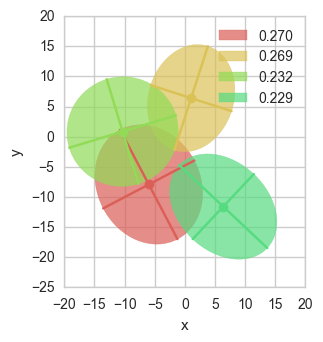

In [85]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [86]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXu0FNWZ//3t+/VcEDhcjOudaERImKEBj75x0CUrGCQr
o04M3uYdmRkZzZolOrkQgzLhJxheDcbcMK8OP0MS1EmQMBpFHeNczKwYNagIkR9mxEQROHAOcM7p
0119q6r3j+aps2tXVXdVd3V3ne79Wcslp6u6endV1/7W8+zn4lNVVYVAIBAIBB2Cv9UDEAgEAoGg
mQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQdBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQ
dBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQdBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAI
BB2FED6BQCAQdBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQdBRC+AQCgUDQUQjhEwgE
AkFHIYRPIBAIBB2FED6BQCAQdBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQdBRC+AQC
gUDQUQjhEwgEAkFHIYRPIBAIBB2FED6BQCAQdBRC+AQCgUDQUQjhEwgEAkFHIYRPIBAIBB2FED6B
QCAQdBTBVg9AIGg0qqoin8/D7/cjGAzC7xfPewJBJyOET9DWyLKMUqmEUqkERVEAQPt/KBRCLBYT
QigQdBhC+ARtiSzLGBkZgaIoiMVi8Pl88Pl8AIB8Pg9FUVAoFCDLMvx+v2YNCotQIGh/hPAJ2g5F
UZDP55HP5wEA4XAYsizD5/MZRM3n80FVVc0yBKATwlAopAmmQCBoD4TwCdoKVsCIbDYLVVUN+6qq
ClVVNWGj/7NCmMvlhBAKBG2GTzWbEQSCCYaqqigWi1AUBT6fT3N12iEQCGj/+f1+S2GjW0UIoUAw
sRHCJ5jwKIqCYrGoWW+yLGNsbAyyLGv7xGIxzZIrFosVjyeEUCBob4TwCSYs/Nqcz+dDoVBAJpPR
uTZjsRhCoZAWzSlJkhbUEggEIMuyto3H5/PphJANkuHHQpAQhkIhBINBIYQCgccQa3yCCQnv2lRV
FZlMRgtoYbGK0vT5fIhEItrxZFnWhJSETFVVLR2C3mMmhKy48e8hgaWoUSGEAkFrEcInmHCw4mTm
2vT5fEgkEhgbG7N9TJ/PpwlTJBKBoiiaEMqyXLcQFotFzcVK4w4Gg1qqhUAgaB5C+AQTBhIdSk0A
yjl5mUxG2ycUCiGRSNQtJqy7EkDNQkjWJjueXC6nuVpLpZK2n7AIBYLmIIRPMCHgA1gURUE2m0Wh
UND2icfjiEQimuuTsFrGdrK87bYQEvRdZFlGoVDQPkcIoUDQOITwCTwP79oslUoYGxvTAlL8fj+S
ySSCQeufs9viUY8QEqzwsu5RIYQCQWMRwifwLGauTUmSIEmStk84HHbs2myEcLBCSInxVkJIUECO
lWvUTAjJgqTPonVFgUBgHyF8Ak9i5trMZDK6HLxEIqFFZXoJEi0rIWQry1hFgLLBMuwxASGEAkG9
COETeA7eNVgsFjE2NqZZS4FAAMlkEoFAwPIY/OTfynRVXggpj5BEi7UIFUXRRB8QQigQNAIhfALP
kMvlIEkSVFVFIpGAqqrIZrPI5XLaPpFIBPF43NFk7rUaDax4RaNRqKpqWCMkhBAKBO4jhE/gCWRZ
Ri6X00QuGo2a5uaFw+FWDrMhsJGfABouhFSGjSrLiDZMgk5DCJ+gpbABLCyjo6OapRYMBpFMJjtm
gm60EMqyjGw2C6BsQUciEa2yjLAIBZ2AED5By+ADWFhI9GKxGKLRaEdPxo0QQvbYdKx8Pq/7LCGE
gnZFCJ+gJZjl5rFreT6fD8lkUsuTqwU2kb1aYemJRL1CaGY5W7lGAQghFLQdQvgETYVcm2w3hFwu
p7neiO7u7opRm04/s52pRQiJfD4PRVEMLZhYcTNbIxRCKJjICOETNA07uXlEI9fz2n2idiKEqqrq
yr5Z9SIUQihoJ4TwCZoC2wCWcvMymYyu7FgkEtGqspit+wlqgxdCWZa188zXNeWFsR4hDIVCFRv5
CgStQgifoKGY9c3jy45Rbh5reQgaBytEFNHJWoOsK1QIoaAdEcInaBh8AIuiKBgbG9NVZaGOCo2A
t2YEZfhzwvYipO1CCAXtjBA+gevwxaV9Ph8KhQIymUzFsmONmgCF+DmjGUJYKpUwMjICoFysIBKJ
IBwOG5r4CgSNQAifwFXMXJvZbBb5fF7bJxqNVu08LsTKOzRCCAFo71MUBYVCwWARhsPhjilaIGgu
QvgErsG7NmVZ7piyY51EvUJo1lOwmms0GAxqrlGBoF6E8Anqhs/N8/l8yOfzyGQy2j5eLDsmrEp3
3Mv1CCFQ7sZB1qCVazSfzyOXy+kq0QghFNSKED5BzZj1kqPmqmyEpt2yY1bdyWtFrBW1Bl4IrbrT
E/QbYtMuKB/QqtYoVfoRQiioBSF8gpqRJEkLUOjp6UGpVMLY2JguNy+ZTGoTYKswi2IUNA+2Oz0w
XsiAL1zAP0jxQsiKmpUQ0n4kvEIIBWYI4RM4hgJYWJcVuaKIcDiMeDzuiYlHURSk02kA5TUm4eJs
LSRMJHzUk5C3CGsRQjoO64UQQijgEcIncAQfwEKwokcBLE4tK7ctMZpAaRIEoFtvAoBCoWAacSho
HuQaZS1CM9eoUyGk9wghFPAI4RPYgu+bRx0VWMxy8+r5vHrgizED5UnPTPiISqH3gubBukZVVTUE
y7gphGzPx3g8Lq55hyCET1AVq9w81soLhUJIJpOemDiKxSLGxsa0v6nFEYlePp83iDagjzisFGgh
aB503usRQrPi2fRv+i34/X7IsqyzCEOhkLjmbYoQPkFFzHLzMpmMQTi80CxWVVXkcjldHVAA2tM/
CTdrCSQSCdPQeyfWhMA5tVr09Qihnaa8rEVIUaNCCNsPIXwCU+yWHeNzsuqhnnQGszqgVB+00mRl
N/TeTAjJkhCteFqHlRDSb7daU172+vLHpdeFELYfQvgEBvi+eVZlx8LhMEZHRwG0NhmcXJt8HVC2
7ZEVfJCOWei9lRCyIfnVrAkv4bWoVjfPFQkhVQeq1pSXoN+41TVkhZAegFghDIVCphVpBN5ECJ9A
h52yY8lkEqFQyFVrrxbMXJvU4sitCcgq0IIN9AHMrQlaXxKBMq3DSVNeq2vICyHvmeDdqUIIvY8Q
PgEAYwALAEPZsVAohEQioa1vuX1TOzmemWvTbh3QWsdt5lazO4myE6jXLK5OghfCbDarW/tthBDS
A5AQQu8ghE9gcG0qioJsNqsL9ae+eVY3rtuTeaXjWbk2+TQK1j3ViAnHiTVhVqOSrEdhEbYev9+P
WCzWEIuQdYnzlWXEdW8NQvg6GD6niXLzvFh2DGiOa7MezITQqlgzbZckqaWpE606b16zelnRaqRr
lO08QW5RIYTNp/WzmaAlmOXmSZKkE5VwOIxEImF5MzbzJq3HtdkqrLoW5PN53cQvUie8Sz1CWKkp
L/2bjkUPm4FAAIlEQghhgxHC14HwASyKoiCTyeiKBicSCUQiEdvHbGQ3BbuuTa9DQsh2IwiHwx2f
OjGRvo8Tq95Jd3oSVKD8e6dehLRvKBRqy2vfKoTwdRB0QymKotXS9KqoUASll12b9eLz+RAKhdo6
dcLr0DmuJ+DJje707DjMLEIhhO4ihK9DoA4F+Xxe610mSZKu7JhTUakn4bwaqqoinU7X5dqcaJNC
vakTQghbTz1CCIwLXTXXqBDC+hDC1wGwASxA+eYZHR3V5eZ5bb0sl8u5ZoVWEuVGRXzWi1upEyJi
tLU4EULaTh4

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEpCAYAAACN9mVQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXt0FPX9///c3ZBssgECmzuikIRcuJgNMVjaoMUGFT8t
UCsobZX6gxPEBmw95Ash0VRQhELtxxYBRaQtqEdERAVL/WgRj2hVArmUJGACAiFskoUkhOxuArPz
+2OdZe87Mzu7O5u8HufkwM68Z97v2cs853V5v94KlmVZEARBEIQHlKEeAEEQBCFvSCgIgiAIr5BQ
EARBEF4hoSAIgiC8QkJBEARBeIWEgiAIgvAKCQVBEAThFRIKgiAIwisRoR5AKLl+/Tq6u7sRFRUF
pZI0kyDkhsViQV9fH4YPH46ICOG3q/7+fly/fp13+4iICERGRgruZ6AzqIWiu7sb3333XaiHQRCE
D8aMGQOtVivomP7+ftT9twpg+d/4lUolJkyYQGLhxKAWiqioKADAl+82oOeSKWTjsFgYmM1mqNVq
KJWqkI3DG+EwRiA8xhkOYwTkMc6h2mhM/XmO7bcqhOvXrwNsJIZp30fEEIPv9tficeXSLFy/fp2E
wolBLRScu6nnkgld+qshGwdjYWA0GhETcx0qmd44wmGMQHiMMxzGCMhrnP64hiOGGDAksk3C0Qw+
yDFPEARBeIWEgiAIgvAKCQVBEAThFRIKgiAIwiskFARBEIRXSCgIgiAIr5BQEARBEF4hoSAIghBB
f38/Vq1ahYKCAkybNg07duzw2La+vh7z5s2DTqfD3LlzceLECYf9+/fvx4wZM6DT6VBSUoLOzk63
51m4cCH27dvnsO306dNYuHAh8vPzUVRUhJdfftlh/5IlS5CdnY2cnBzbv4cPHxZ0rSQUBEEQIli/
fj3q6+uxc+dOVFZWYtOmTfjoo49c2plMJhQXF6OgoAB79+6FTqfD4sWLYTabAQC1tbWoqKjA0qVL
sXv3bnR3d6OsrMzhHCzLYs2aNfjiiy8ctpvNZhQXFyM5ORnvvPMOnn76afz973/HG2+8YWtz+vRp
/OlPf8Lnn3+OI0eO4PPPP8cPf/hDQddKQkEQBCEQk8mEPXv2oKKiAtnZ2SgqKsKiRYuwa9cul7YH
DhxAdHQ0SktLkZaWhvLycmg0Ghw8eBAA8Prrr2PmzJmYNWsWMjMzsWHDBhw+fBgXLlwAALS1tWHB
ggU4dOgQhg0b5nDub775BleuXMEzzzyDMWPG4I477sBvfvMb7N+/H4DV6mlpacHEiROh1Wptf0OG
DBF0vSQUBEEQAmlsbATDMNDpdLZt+fn5qK2tdWlbW1uL/Px8h22TJ0/G8ePHAQDV1dUoKCiw7UtO
TkZKSgpqamoAWN1Wqamp2Lt3LzQajcN5xo8fj5deesmlsm5PTw8AqzWhUCgwevRoP652kNd6IgiC
EENHRwfi4uIcbtBarRZ9fX3o7OzEiBEjbNvb29uRmZnpcLxWq0VTU5PtXImJiQ774+PjodfrAQDT
p0/H9OnT3Y6DsxA4+vr6sHv3bvzkJz8BYBWK2NhYlJaW4quvvkJKSgqWLl2KO+64Q9D1kkVBEAQh
EJPJ5FJhlnvd39/vsN1sNrtty7XztZ8vLMtixYoVMBqNKC4uBmAVir6+PkybNg3bt2/HnXfeiSVL
lrgE031BFgVBEIRAoqKiXG7k3Ovo6GhebdVqNa/9fGAYBv/v//0/HD58GH/7299sVkZJSQkWLFiA
oUOHAgCysrLw3//+F2+99RZWr17N+/xkURAEQQgkKSkJXV1dsFgstm0GgwFqtdol4JyUlISOjg6H
bQaDAQkJCQCAxMREGAwGl/3O7ihPXL9+HU888QQOHTqEbdu2ITc312E/JxIc6enpaG9v53VuDhIK
giAIgeTk5CAiIgLV1dW2bUePHsXEiRNd2ubm5toC1xzHjh1DXl4eAECn06Gqqsq27+LFi9Dr9S43
fE889dRT+PLLL7F9+3bcdtttDvvKysqwatUqh22NjY0YO3Ysr3NzkFAQBEEIRK1WY/bs2aisrERd
XR0+/vhj7NixAwsWLABgtQj6+voAAPfccw96enqwdu1aNDc349lnn4XJZMK9994LAJg/fz7ee+89
7NmzB42NjVixYgWmT5+OUaNG+RzHkSNH8O6772LlypUYPXo0DAYDDAYDLl++DAC466678MEHH2Df
vn04d+4cNm3ahGPHjuHhhx8WdL0UoyAIghBBWVkZnnnmGVsM4IknnkBRUREAoLCwEOvWrcOcOXMQ
GxuLrVu3orKyErt370ZWVha2bdtmi0HodDqsXr0aL774Irq7u1FYWIg1a9a47VOhUDi8/uijj6BQ
KPD00087bE9NTcUnn3yCGTNmoLKyElu2bIFer0dGRgZeffVVpKamCrpWBcuyrKAjBhBGoxENDQ34
6NVjMlkKNSbkS056IhzGCITHOMNhjIA8xhmXHIu7F01GTk4OYmJiBB3L/b5HJr/GaynUa/1JuKz/
/0T1NdAh1xNBEAThFRIKgiAIwiskFARBEIRXKJhNEMSAprPvPBSWcz7bsdeEzYQeTISFULS1teG5
557DV199BbVajZkzZ+LJJ59EZGQkWlpa8NRTT6G6uhqjRo1CWVkZfvSjH4V6yMQA4dRlE++2mSOj
fTcigs4Fdgr62XE+20WyIyAsF2jwEBZCsWzZMsTFxeGNN95AV1cXVq1aBZVKhdLSUjz++OPIycnB
O++8g48//hglJSX45z//ieTk5FAPm5ARQm74zqRP8l15s7nuvEMfJBrEQEL2QnH69GnU1tbiyJEj
GDlyJACrcPzxj3/EtGnT0NLSgrfffhtRUVEoLi7Gl19+iT179qCkpCTEIydCQVNXPyyMAsr+fiic
9vG54YvF/tycaJBYEAMF2QtFQkICXn31VZtIcPT09KCmpgYTJkxAVFSUbXt+fr7DtHpi4OHNOhg7
PvVG7r8qNLn/6ZNGk1gQAwrZC8XQoUMdYg4sy2LXrl2YOnWq2zruWq0WbW2+J9cQ8saXq8iTdcAw
TCCGIxgSC2IgIXuhcOaPf/wjGhoasGfPHuzYsUOSOu5EaBArBuECiQUxUAgrodiwYQN27tyJ//3f
/0VGRgaioqLQ3d3t0EZoHXcAsFgYMJbQPYlypYrtSxbLDX/H2NTlXrzHjvecZyLGOpDbezlmfCrO
1Lfi5GUTMuKsDzVyG6Mn5DBOSwh/l8QNwkYo1qxZg7feegsbNmywFd5KSkqyLSfIYV/nnS9msxlG
o1GysYrFbDaHegg+4TvGFpNzKBlISde6bAvU+y6n9zJpTBwuNl/CqUsm3BR9o7SanMbojVCOM9oc
NreoAU1YfAqbNm3CW2+9hT//+c+YMWOGbXtubi62bduG/v5+mwuqqqrKpSa7L9RqNWJirks6ZiFY
LBaYzWao1WoolfKcLM93jJzloFR5txYChVzfy/RJMThT34qYmEjZjtEZOYxTqHeACAyyF4rm5mZs
2bIFixcvRl5ensNKUFOmTEFKSgpWrlyJxx9/HP/+979RV1eHdevWCepDqVTJooqnUqmUxTi84WmM
XLxBAXnEFpRKZciynjyR8X3MIv17F1Q4fN5AaMepDIP3ZzAge6H45JNPYLFYsGXLFmzZsgWANfNJ
oVCgoaEBL730EsrLy/GLX/wCN998M1566SWabBdE7APSchCIcKCpqx+pkb7bEYRckL1QFBcXo7i4
2OP+m2++GTt37gziiAgOTiRIIPiTPmk0murOh3oYBCEI+TpICVlDIiGeseNT3Qb7CUKuyN6iIORF
U1e/bOIQYqjr6QQATBo6IsQjIYjwgYSC4E2LSQGlSt4icaK3G4zFAlXvNZf1hTnSxyWj7lu9oPNK
LSwp6Vo0fde

## Goodness-of-fit Statistics

In [87]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.970  0.015      0.021  3.237848e-09      0.044       0.190

# 5. GMM by Optimization

In [88]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [89]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -20.697802994218314
     jac: array([ -6.50321960e-01,   4.76837158e-07,   4.76837158e-07,
         2.38418579e-07,   0.00000000e+00,  -7.15255737e-07,
        -6.50304317e-01,   0.00000000e+00,  -2.38418579e-07,
        -2.38418579e-07,  -2.38418579e-07,  -1.19209290e-06,
        -6.50321484e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -2.38418579e-07,   9.53674316e-07,
        -6.50320530e-01,   0.00000000e+00,   0.00000000e+00,
         2.38418579e-07,   0.00000000e+00,  -4.76837158e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2723
     nit: 104
    njev: 104
  status: 0
 success: True
       x: array([  0.61073032,  -3.93131814,  -7.84234087,  12.3197726 ,
        10.07802619,  -0.33848413,   0.0345232 ,   5.80885014,
         3.3638358 ,   2.83068964,   3.58824366,  -0.20966056,
         0.07338827,   3.85433225,  -8.66337836,   9.89553944,
         5.08840033,  -0.75251168,   0.28135821,  -2.02446187,
 

## 5.1 GMM Result

In [90]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.611  -3.931  -7.842  12.320  10.078  -0.338
2  0.281  -2.024   8.140   8.003   7.629   0.356
3  0.073   3.854  -8.663   9.896   5.088  -0.753
4  0.035   5.809   3.364   2.831   3.588  -0.210

GMM Plot Result
0.610730320937 [[-3.93131814 -7.84234087]] [  8.81579727  13.25236308] -119.573530001
0.281358205074 [[-2.02446187  8.13983131]] [ 6.26005356  9.11375194] -48.8356408452
0.0733882749186 [[ 3.85433225 -8.66337836]] [  3.10333108  10.68563779] -113.226985241
0.0345231990702 [[ 5.80885014  3.3638358 ]] [ 2.68552532  3.69814145] -159.392770538


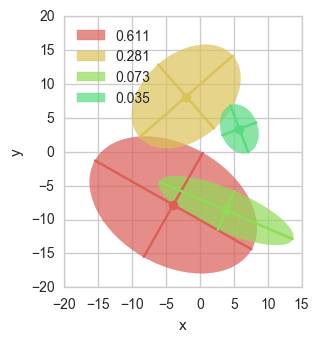

In [91]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [92]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.008      0.018  1.025790e-09      0.025       0.107

In [93]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXuUG+V9///WXVppL/ba61toEgjGTp1axiz8khoO/sZg
nF8KtMQQ6K+4LS7k9GBomjjE4MZfbOpCIKRJTA7UJU5iTBPjuBAwUELbkJ4QLgaMDa4JNjfjy3oX
27sraXSbmd8f8mf2mUcz0ow0I81Kz+scDl5pNHqk0cx7PnefqqoqBAKBQCBoE/zNXoBAIBAIBI1E
CJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCt
EMInEAgEgrZCCJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI2gohfAKBQCBo
K4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI
2gohfAKBQCBoK4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCtEMInEAgE
grZCCJ9AIBAI2gohfAKBQCBoK4TwCQQCgaCtEMInEAgEgrZCCJ9AIBAI2gohfAKBQCBoK4TwCQQC
gaCtCDZ7AQKB26iqilwuB7/fj2AwCL9f3O8JBO2MED5BSyPLMorFIorFIhRFAQDt/6FQCLFYTAih
QNBmCOETtCSyLGN4eBiKoiAWi8Hn88Hn8wEAcrkcFEVBPp+HLMvw+/2aNSgsQoGg9RHCJ2g5FEVB
LpdDLpcDAITDYciyDJ/PVyZqPp8PqqpqliEAnRCGQiFNMAUCQWsghE/QUrACRmQyGaiqWratqqpQ
VVUTNvo/K4TZbFYIoUDQYvhUoyuCQDDOUFUVhUIBiqLA5/Nprk4rBAIB7T+/328qbHSqCCEUCMY3
QvgE4x5FUVAoFDTrTZZlpFIpyLKsbROLxTRLrlAoVNyfEEKBoLURwicYt/CxOZ/Ph3w+j3Q6rXNt
xmIxhEIhLZtTkiQtqSUQCECWZe05Hp/PpxNCNkmGXwtBQhgKhRAMBoUQCgQeQ8T4BOMS3rWpqirS
6bSW0MJilqXp8/kQiUS0/cmyrAkpCZmqqlo5BL3GSAhZceNfQwJLWaNCCAWC5iKETzDuYMXJyLXp
8/kQj8eRSqUs79Pn82nCFIlEoCiKJoSyLNcthIVCQXOx0rqDwaBWaiEQCBqHED7BuIFEh0oTgFJN
Xjqd1rYJhUKIx+N1iwnrrgRQsxCStcmuJ5vNaq7WYrGobScsQoGgMQjhE4wL+AQWRVGQyWSQz+e1
bTo6OhCJRDTXJ2EWxrYT3nZaCAn6LLIsI5/Pa+8jhFAgcA8hfALPw7s2i8UiUqmUlpDi9/uRSCQQ
DJr/nJ0Wj3qEkGCFl3WPCiEUCNxFCJ/Asxi5NiVJgiRJ2jbhcNi2a9MN4WCFkArjzYSQoIQcM9eo
kRCSBUnvRXFFgUBgHSF8Ak9i5NpMp9O6Grx4PK5lZXoJEi0zIWQ7y5hlgLLJMuw+ASGEAkG9COET
eA7eNVgoFJBKpTRrKRAIIJFIIBAImO6Dv/g3s1yVF0KqIyTRYi1CRVE00QeEEAoEbiCET+AZstks
JEmCqqqIx+NQVRWZTAbZbFbbJhKJoKOjw9bF3Gs9GljxikajUFW1LEZICCEUCJxHCJ/AE8iyjGw2
q4lcNBo1rM0Lh8PNXKYrsJmfAFwXQmrDRp1lxBgmQbshhE/QVNgEFpaRkRHNUgsGg0gkEm1zgXZb
CGVZRiaTAVCyoCORiNZZRliEgnZACJ+gafAJLCwkerFYDNFotK0vxm4IIbtv2lcul9O9lxBCQasi
hE/QFIxq89hYns/nQyKR0OrkaoEtZK/WWHo8Ua8QGlnOZq5RAEIIBS2HED5BQyHXJjsNIZvNaq43
oqurq2LWpt33bGVqEUIil8tBUZSyEUysuBnFCIUQCsYzQvgEDcNKbR7hZjyv1S/UdoRQVVVd2zez
WYRCCAWthBA+QUNgB8BSbV46nda1HYtEIlpXFqO4n6A2eCGUZVn7nvm+prww1iOEoVCo4iBfgaBZ
COETuIrR3Dy+7RjV5rGWh8A9WCGijE7WGmRdoUIIBa2IED6Ba/AJLIqiIJVK6bqy0EQFN+CtGUEJ
/jthZxHS80IIBa2MED6B4/DNpX0+H/L5PNLpdMW2Y25dAIX42aMRQlgsFjE8PAyg1KwgEokgHA6X
DfEVCNxACJ/AUYxcm5lMBrlcTtsmGo1WnTwuxMo7uCGEALTXKYqCfD5fZhGGw+G2aVogaCxC+ASO
wbs2ZVlum7Zj7US9Qmg0U7CaazQYDGquUYGgXoTwCeqGr83z+XzI5XJIp9PaNl5sOyasSmfcy/UI
IVCaxkHWoJlrNJfLIZvN6jrRCCEU1IoQPkHNGM2So+GqbIam1bZjZtPJa0XEipoDL4Rm0+kJ+g2x
ZRdUD2jWa5Q6/QghFNSCED5BzUiSpCUodHd3o1gsIpVK6WrzEomEdgFsFkZZjILGwU6nB8YaGfCN
C/gbKV4IWVEzE0LajoRXCKHACCF8AttQAgvrsiJXFBEOh9HR0eGJC4+iKBgdHQVQijEJF2dzIWEi
4aOZhLxFWIsQ0n5YL4QQQgGPED6BLfgEFoIVPUpgsWtZOW2J0QWULoIAdPEmAMjn84YZh4LGQa5R
1iI0co3aFUJ6jRBCAY8QPoEl+Ll5NFGBxag2r573qwe+GTNQuugZCR9RKfVe0DhY16iqqmXJMk4K
ITvzsaOjQxzzNkEIn6AqZrV5rJUXCoWQSCQ8ceEoFApIpVLa3zTiiEQvl8uViTagzzislGghaBz0
vdcjhEbNs+nf9Fvw+/2QZVlnEYZCIXHMWxQhfIKKGNXmpdPpMuHwwrBYVVWRzWZ1fUABaHf/JNys
JRCPxw1T7+1YEwL71GrR1yOEVobyshYhZY0KIWw9hPAJDLHadoyvyaqHesoZjPqAUn/QShcrq6n3
RkJIloQYxdM8zISQfrvVhvKyx5ffLz0uhLD1EMInKIOfm2fWdiwcDmNkZARAc4vBybXJ9wFlxx6Z
wSfpGKXemwkhm5JfzZrwEl7LanXyuyIhpO5A1YbyEvQbNzuGrBDSDRArhKFQyLAjjcCbCOET6LDS
diyRSCAUCjlq7dWCkWuTRhw5dQEyS7RgE30AY2uC4ksiUaZ52BnKa3YMeSHkPRO8O1UIofcRwicA
UJ7AAqCs7VgoFEI8HtfiW06f1Hb2Z+TatNoHtNZ1G7nVrF5E2Quo1yyudoIXwkwmo4v9uiGEdAMk
hNA7COETlLk2FUVBJpPRpfrT3DyzE9fpi3ml/Zm5NvkyCtY95cYFx441YdSjkqxHYRE2H7/fj1gs
5opFyLrE+c4y4rg3ByF8bQxf00S1eV5sOwY0xrVZD0ZCaNasmZ6XJKmppRPN+t68ZvWyouWma5Sd
PEFuUSGEjaf5VzNBUzCqzZMkSScq4XAY8Xjc9GRs5Elaj2uzWZhNLcjlcroLvyid8C71CGGlobz0
b9oX3WwGAgHE43EhhC4jhK8N4RNYFEVBOp3WNQ2Ox+OIRCKW9+nmNAWrrk2vQ0LITiMIh8NtXzox
nj6PHaveznR6ElSg9HunWYS0bSgUaslj3yyE8LURdEIpiqL10vSqqFAGpZddm/Xi8/kQCoVaunTC
69B3XE/CkxPT6dl1GFmEQgidRQhfm0ATCnK5nDa7TJIkXdsxu6JST8F5NVRVxejoaF2uzfF2Uai3
dEIIYfOpRwiBMaGr5hoVQlgfQvjaADaBBSidPCMjI7raPK/Fy7LZrGNWaCVRdivjs16cKp0QGaPN
xY4Q0vPk4bA

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEpCAYAAACN9mVQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXt0FPX9///c3ZBssgECmzuikIRcuJgNMVjaoMUGFT8t
UCsobZX6gxPEBmw95Ash0VRQhELtxxYBRaQtqEdERAVL/WgRj2hVArmUJGACAiFskoUkhOxuArPz
+2OdZe87Mzu7O5u8HufkwM68Z97v2cs853V5v94KlmVZEARBEIQHlKEeAEEQBCFvSCgIgiAIr5BQ
EARBEF4hoSAIgiC8QkJBEARBeIWEgiAIgvAKCQVBEAThFRIKgiAIwisRoR5AKLl+/Tq6u7sRFRUF
pZI0kyDkhsViQV9fH4YPH46ICOG3q/7+fly/fp13+4iICERGRgruZ6AzqIWiu7sb3333XaiHQRCE
D8aMGQOtVivomP7+ftT9twpg+d/4lUolJkyYQGLhxKAWiqioKADAl+82oOeSKWTjsFgYmM1mqNVq
KJWqkI3DG+EwRiA8xhkOYwTkMc6h2mhM/XmO7bcqhOvXrwNsJIZp30fEEIPv9tficeXSLFy/fp2E
wolBLRScu6nnkgld+qshGwdjYWA0GhETcx0qmd44wmGMQHiMMxzGCMhrnP64hiOGGDAksk3C0Qw+
yDFPEARBeIWEgiAIgvAKCQVBEAThFRIKgiAIwiskFARBEIRXSCgIgiAIr5BQEARBEF4hoSAIghBB
f38/Vq1ahYKCAkybNg07duzw2La+vh7z5s2DTqfD3LlzceLECYf9+/fvx4wZM6DT6VBSUoLOzk63
51m4cCH27dvnsO306dNYuHAh8vPzUVRUhJdfftlh/5IlS5CdnY2cnBzbv4cPHxZ0rSQUBEEQIli/
fj3q6+uxc+dOVFZWYtOmTfjoo49c2plMJhQXF6OgoAB79+6FTqfD4sWLYTabAQC1tbWoqKjA0qVL
sXv3bnR3d6OsrMzhHCzLYs2aNfjiiy8ctpvNZhQXFyM5ORnvvPMOnn76afz973/HG2+8YWtz+vRp
/OlPf8Lnn3+OI0eO4PPPP8cPf/hDQddKQkEQBCEQk8mEPXv2oKKiAtnZ2SgqKsKiRYuwa9cul7YH
DhxAdHQ0SktLkZaWhvLycmg0Ghw8eBAA8Prrr2PmzJmYNWsWMjMzsWHDBhw+fBgXLlwAALS1tWHB
ggU4dOgQhg0b5nDub775BleuXMEzzzyDMWPG4I477sBvfvMb7N+/H4DV6mlpacHEiROh1Wptf0OG
DBF0vSQUBEEQAmlsbATDMNDpdLZt+fn5qK2tdWlbW1uL/Px8h22TJ0/G8ePHAQDV1dUoKCiw7UtO
TkZKSgpqamoAWN1Wqamp2Lt3LzQajcN5xo8fj5deesmlsm5PTw8AqzWhUCgwevRoP652kNd6IgiC
EENHRwfi4uIcbtBarRZ9fX3o7OzEiBEjbNvb29uRmZnpcLxWq0VTU5PtXImJiQ774+PjodfrAQDT
p0/H9OnT3Y6DsxA4+vr6sHv3bvzkJz8BYBWK2NhYlJaW4quvvkJKSgqWLl2KO+64Q9D1kkVBEAQh
EJPJ5FJhlnvd39/vsN1sNrtty7XztZ8vLMtixYoVMBqNKC4uBmAVir6+PkybNg3bt2/HnXfeiSVL
lrgE031BFgVBEIRAoqKiXG7k3Ovo6GhebdVqNa/9fGAYBv/v//0/HD58GH/7299sVkZJSQkWLFiA
oUOHAgCysrLw3//+F2+99RZWr17N+/xkURAEQQgkKSkJXV1dsFgstm0GgwFqtdol4JyUlISOjg6H
bQaDAQkJCQCAxMREGAwGl/3O7ihPXL9+HU888QQOHTqEbdu2ITc312E/JxIc6enpaG9v53VuDhIK
giAIgeTk5CAiIgLV1dW2bUePHsXEiRNd2ubm5toC1xzHjh1DXl4eAECn06Gqqsq27+LFi9Dr9S43
fE889dRT+PLLL7F9+3bcdtttDvvKysqwatUqh22NjY0YO3Ysr3NzkFAQBEEIRK1WY/bs2aisrERd
XR0+/vhj7NixAwsWLABgtQj6+voAAPfccw96enqwdu1aNDc349lnn4XJZMK9994LAJg/fz7ee+89
7NmzB42NjVixYgWmT5+OUaNG+RzHkSNH8O6772LlypUYPXo0DAYDDAYDLl++DAC466678MEHH2Df
vn04d+4cNm3ahGPHjuHhhx8WdL0UoyAIghBBWVkZnnnmGVsM4IknnkBRUREAoLCwEOvWrcOcOXMQ
GxuLrVu3orKyErt370ZWVha2bdtmi0HodDqsXr0aL774Irq7u1FYWIg1a9a47VOhUDi8/uijj6BQ
KPD00087bE9NTcUnn3yCGTNmoLKyElu2bIFer0dGRgZeffVVpKamCrpWBcuyrKAjBhBGoxENDQ34
6NVjMlkKNSbkS056IhzGCITHOMNhjIA8xhmXHIu7F01GTk4OYmJiBB3L/b5HJr/GaynUa/1JuKz/
/0T1NdAh1xNBEAThFRIKgiAIwiskFARBEIRXKJhNEMSAprPvPBSWcz7bsdeEzYQeTISFULS1teG5
557DV199BbVajZkzZ+LJJ59EZGQkWlpa8NRTT6G6uhqjRo1CWVkZfvSjH4V6yMQA4dRlE++2mSOj
fTcigs4Fdgr62XE+20WyIyAsF2jwEBZCsWzZMsTFxeGNN95AV1cXVq1aBZVKhdLSUjz++OPIycnB
O++8g48//hglJSX45z//ieTk5FAPm5ARQm74zqRP8l15s7nuvEMfJBrEQEL2QnH69GnU1tbiyJEj
GDlyJACrcPzxj3/EtGnT0NLSgrfffhtRUVEoLi7Gl19+iT179qCkpCTEIydCQVNXPyyMAsr+fiic
9vG54YvF/tycaJBYEAMF2QtFQkICXn31VZtIcPT09KCmpgYTJkxAVFSUbXt+fr7DtHpi4OHNOhg7
PvVG7r8qNLn/6ZNGk1gQAwrZC8XQoUMdYg4sy2LXrl2YOnWq2zruWq0WbW2+J9cQ8saXq8iTdcAw
TCCGIxgSC2IgIXuhcOaPf/wjGhoasGfPHuzYsUOSOu5EaBArBuECiQUxUAgrodiwYQN27tyJ//3f
/0VGRgaioqLQ3d3t0EZoHXcAsFgYMJbQPYlypYrtSxbLDX/H2NTlXrzHjvecZyLGOpDbezlmfCrO
1Lfi5GUTMuKsDzVyG6Mn5DBOSwh/l8QNwkYo1qxZg7feegsbNmywFd5KSkqyLSfIYV/nnS9msxlG
o1GysYrFbDaHegg+4TvGFpNzKBlISde6bAvU+y6n9zJpTBwuNl/CqUsm3BR9o7SanMbojVCOM9oc
NreoAU1YfAqbNm3CW2+9hT//+c+YMWOGbXtubi62bduG/v5+mwuqqqrKpSa7L9RqNWJirks6ZiFY
LBaYzWao1WoolfKcLM93jJzloFR5txYChVzfy/RJMThT34qYmEjZjtEZOYxTqHeACAyyF4rm5mZs
2bIFixcvRl5ensNKUFOmTEFKSgpWrlyJxx9/HP/+979RV1eHdevWCepDqVTJooqnUqmUxTi84WmM
XLxBAXnEFpRKZciynjyR8X3MIv17F1Q4fN5AaMepDIP3ZzAge6H45JNPYLFYsGXLFmzZsgWANfNJ
oVCgoaEBL730EsrLy/GLX/wCN998M1566SWabBdE7APSchCIcKCpqx+pkb7bEYRckL1QFBcXo7i4
2OP+m2++GTt37gziiAgOTiRIIPiTPmk0murOh3oYBCEI+TpICVlDIiGeseNT3Qb7CUKuyN6iIORF
U1e/bOIQYqjr6QQATBo6IsQjIYjwgYSC4E2LSQGlSt4icaK3G4zFAlXvNZf1hTnSxyWj7lu9oPNK
LSwp6Vo0fde

In [94]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

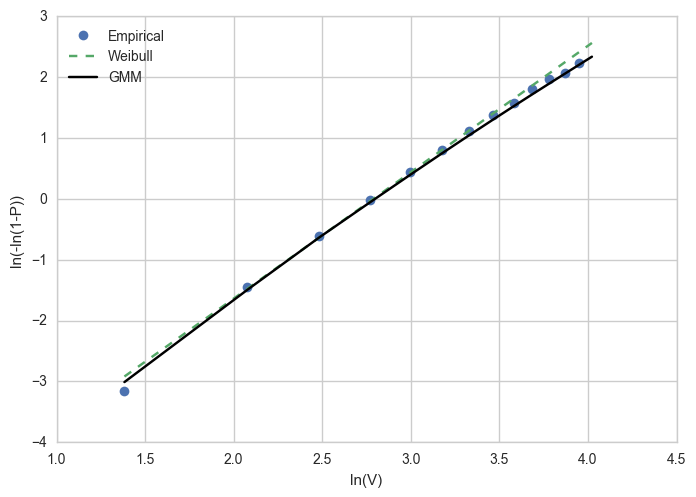

In [95]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


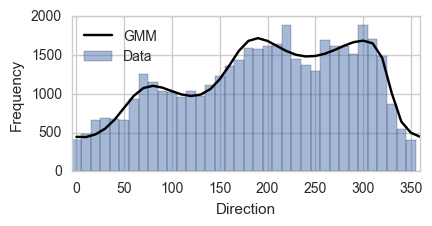

In [96]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


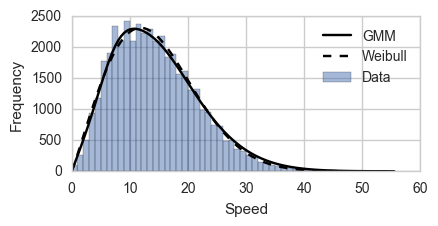

In [97]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [98]:
# %%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.910811619923


## 5.3 Sectoral Comaprison

In [99]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


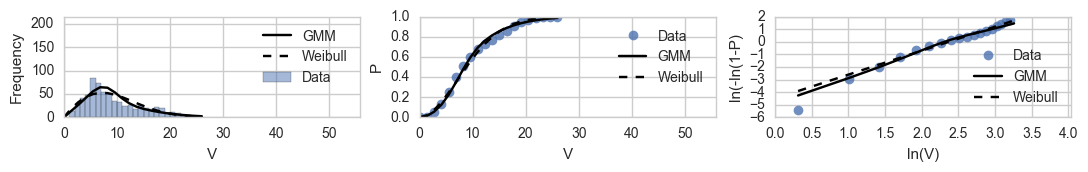

data size: 676 weight 0.01578075028596774
GMM Weibull
R square 0.806970542915 0.757616737599
max diff: 0.0515459098783 0.0600015481318 speed value: 6.83921348347 y gmm 0.344903794264
 
25.0 (15.0 - 35.0) degree


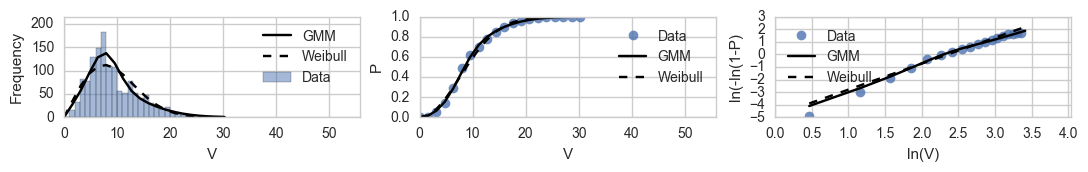

data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.905673159483 0.837269956365
max diff: 0.044832578751 0.0644270195774 speed value: 7.96521906885 y gmm 0.448490863385
 
45.0 (35.0 - 55.0) degree


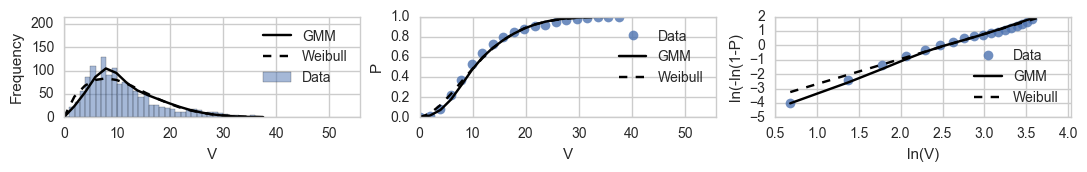

data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.908371730034 0.867764092887
max diff: 0.0551925582048 0.0521090532032 speed value: 9.88109730625 y gmm 0.470572938434
 
65.0 (55.0 - 75.0) degree


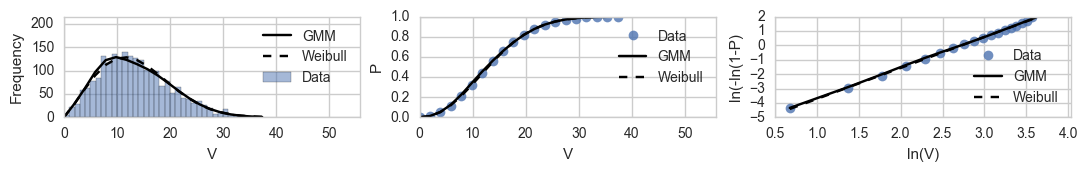

data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.968598606113 0.973672752091
max diff: 0.0161956948822 0.00997252740415 speed value: 7.86267120693 y gmm 0.224911291213
 
85.0 (75.0 - 95.0) degree


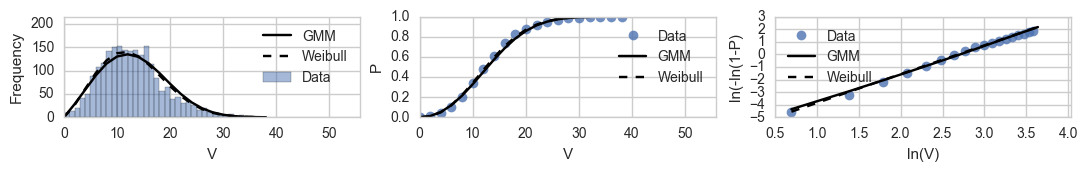

data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.945277360468 0.960843277537
max diff: 0.051447704942 0.0308401183124 speed value: 16.0325864288 y gmm 0.685153302845
 
105.0 (95.0 - 115.0) degree


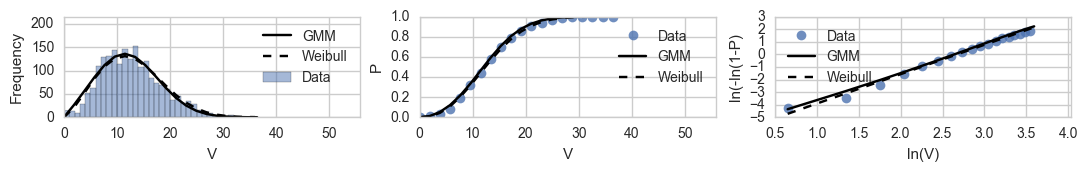

data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.946617370461 0.947683471419
max diff: 0.0379055521847 0.0259260590047 speed value: 5.74846454444 y gmm 0.121112813909
 
125.0 (115.0 - 135.0) degree


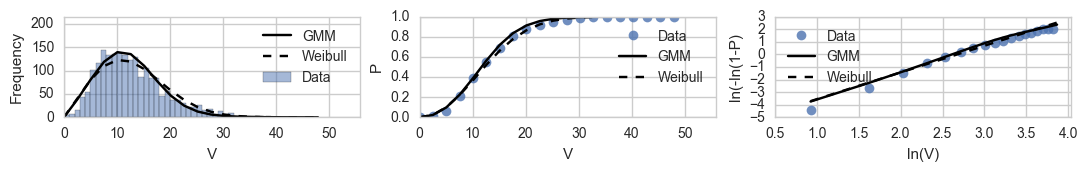

data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.961022456885 0.947138642713
max diff: 0.0394814562168 0.0355018469605 speed value: 22.6726566996 y gmm 0.955774430806
 
145.0 (135.0 - 155.0) degree


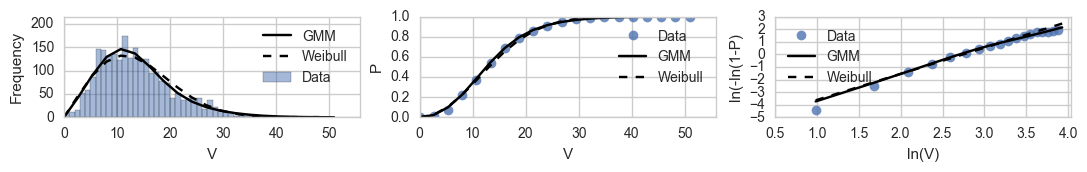

data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.956779346895 0.937845882685
max diff: 0.0234468916858 0.0309469248092 speed value: 5.35737172024 y gmm 0.0990950004831
 
165.0 (155.0 - 175.0) degree


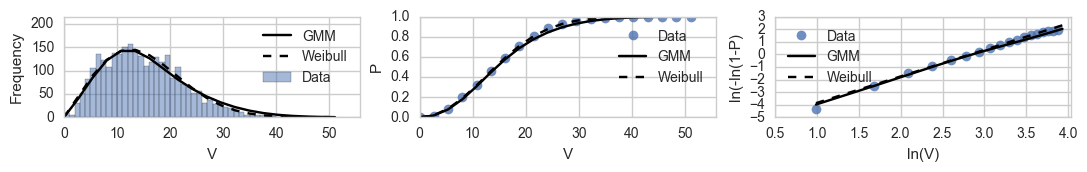

data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.958175184172 0.966650969317
max diff: 0.038402763302 0.00958821907167 speed value: 24.1891573545 y gmm 0.84346438212
 
185.0 (175.0 - 195.0) degree


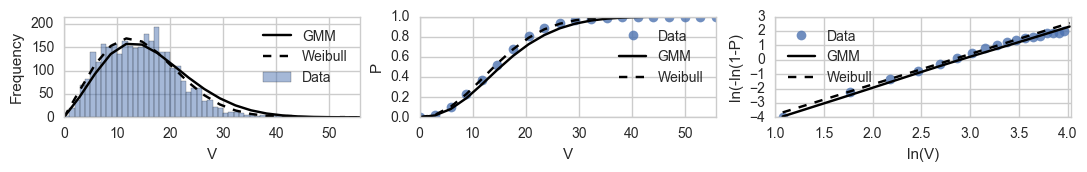

data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.934193936709 0.96297252776
max diff: 0.0802865229216 0.0163673088791 speed value: 20.5685985398 y gmm 0.72583914806
 
205.0 (195.0 - 215.0) degree


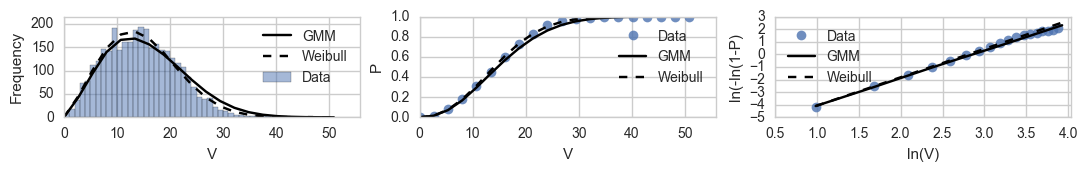

data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.966708882203 0.978279679223
max diff: 0.0524607719215 0.0122051141395 speed value: 24.0930317522 y gmm 0.861833687827
 
225.0 (215.0 - 235.0) degree


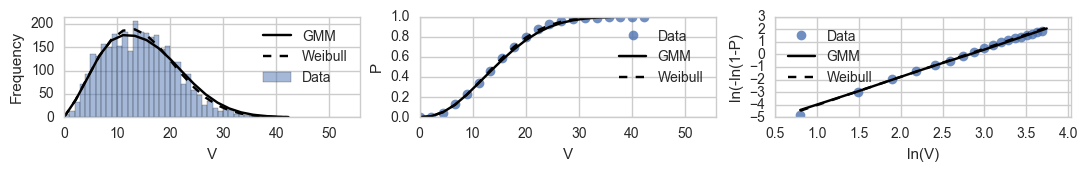

data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.962370451924 0.966291655378
max diff: 0.0332688525409 0.0127650566517 speed value: 22.2643986569 y gmm 0.840718546199
 
245.0 (235.0 - 255.0) degree


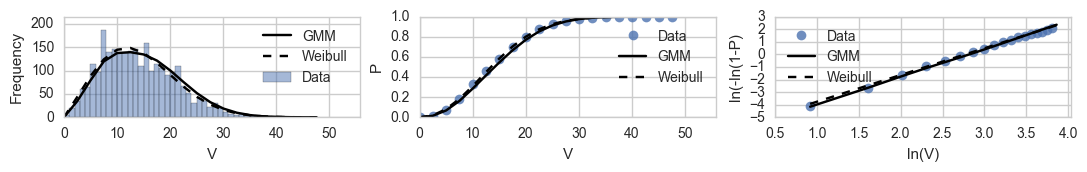

data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.933877900306 0.939706234574
max diff: 0.0424235355736 0.0178913746793 speed value: 10.0257663807 y gmm 0.285531436284
 
265.0 (255.0 - 275.0) degree


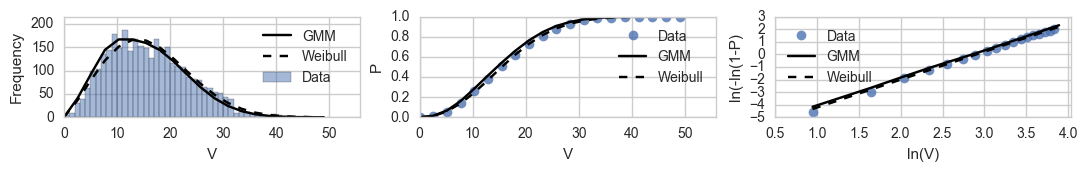

data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.964391045582 0.964773101372
max diff: 0.0398853635662 0.0135469653286 speed value: 18.051880439 y gmm 0.660689717966
 
285.0 (275.0 - 295.0) degree


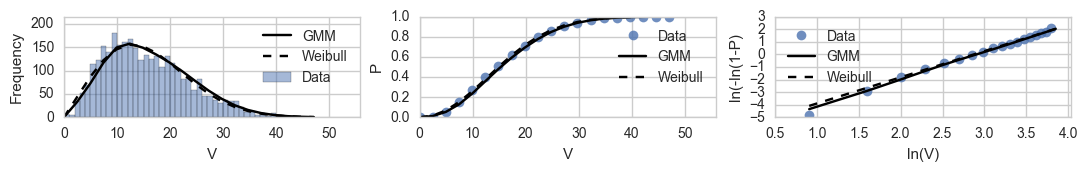

data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.951929411696 0.955345413183
max diff: 0.0454076314162 0.0255783944929 speed value: 12.3929499872 y gmm 0.357849073565
 
305.0 (295.0 - 315.0) degree


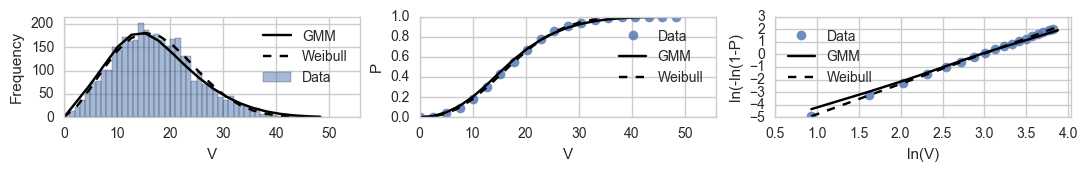

data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.964486712933 0.979918409414
max diff: 0.0274151623495 0.00830795899628 speed value: 15.2547625465 y gmm 0.45316599661
 
325.0 (315.0 - 335.0) degree


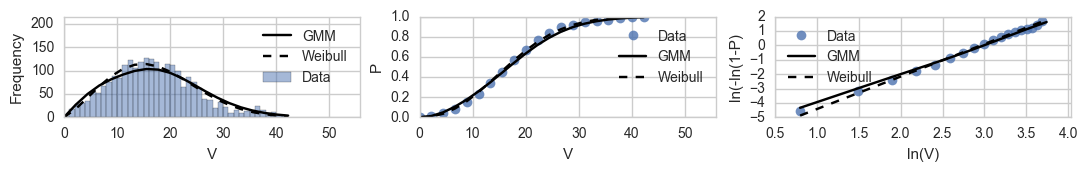

data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.912421899988 0.946898636857
max diff: 0.045104208838 0.0191487705188 speed value: 22.2315063789 y gmm 0.718254569788
 
345.0 (335.0 - 355.0) degree


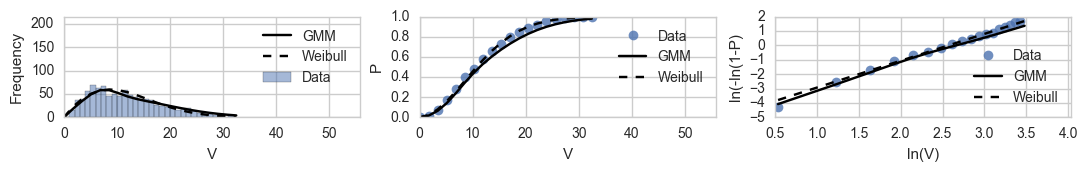

data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.902326301801 0.909483810815
max diff: 0.06806530627 0.0351659003661 speed value: 17.0893028306 y gmm 0.73193469373
 
Wall time: 3min 33s


In [100]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9464065140525536 0.9494912125164152


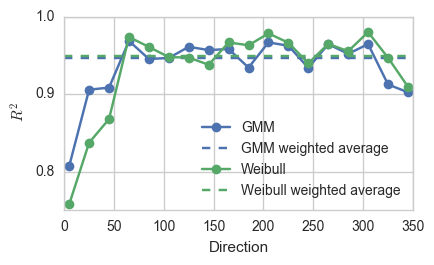

In [101]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print(gmm_mean, weibull_mean)

0.042849896123331614 0.021668691744108015


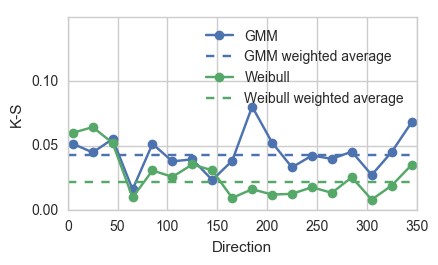

In [102]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print(gmm_mean, weibull_mean)

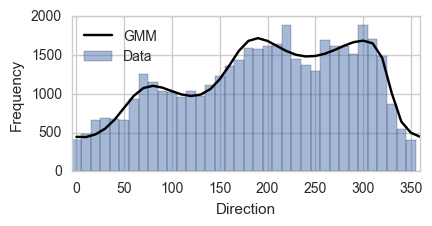

In [103]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [104]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [105]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

185.0 (175.0 - 195.0) Degree Speed Distribution
0.0871658725001 21.0 0.740746978779


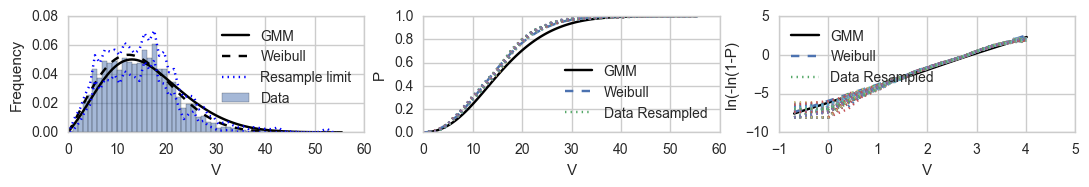

In [106]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [107]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


185.0 (175.0 - 195.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAG+CAYAAAADVbVjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXmYFOW5/n9XV3V3dffMMDDgSFhcgQERyLCJwRUjmpgD
WVzPMQbiV6Mmx5NEJYgRJBHHJZ5o3AnB/EQxRqNGPeAJ4InRqKiARBEBwQWRfWZ6prt6rfr90bxF
dXVVr1XV2/O5Li+cmpqq9+2qrveuZ+UURVFAEARBEARB1A2ucg+AIAiCIAiCcBYSgARBEARBEHUG
CUCCIAiCIIg6gwQgQRAEQRBEnUECkCAIgiAIos4gAUgQBEEQBFFnkAAkCIIgCIKoM0gAEgRBEARB
1BkkAAmCIAiCIOoMEoAEQRAEQRB1BglAgiAIgiCIOoMEIEEQBEEQRJ1BApAgCIIgCKLOIAFIEARB
EARRZ5AAJAiCIAiCqDNIABIEQRAEQdQZJAAJgiAIgiDqDBKABEEQBEEQdQYJQIIgCIIgiDqDBCBB
EARBEESdQQKQIAiCIAiiziABSBAEQRBE3SBJEn7729/i3HPPxdixY3HSSSfhP//zP7Ft2zYAwNq1
a9HW1oavf/3rhn//05/+FG1tbXj77bcBAJdeeina2trw/PPPZ+y7fft2tLW14fvf/759EyoSEoAE
QRAEQdQF4XAYF110EVasWIE5c+Zg5cqV+MMf/oBAIICLLroIX3zxhbrv7t27VVHIiMfjeO2118Bx
XNp2t9uNNWvWZJxv1apVGftWCiQACYIgCIKoC+677z50dnbimWeewemnn46BAwdi1KhRuO222zBm
zBgsXbpU3XfixIkZou6NN97Acccdl3HciRMn4vXXX0cikUjbvmrVKowbN86eyZQICUCCIAiCIGoe
RVHw3HPPYfbs2WhoaMj4/R133IEbbrgBAMBxHKZNm4bVq1en7bNq1SqcffbZGX87btw4eL1evPnm
m+q2vXv34tNPP8XkyZMtnok1COUeAEEQBEEQ1U93dzc2b97s6Dnb2trQp0+fvPb97LPPcPDgQbS3
txv+vn///mk/n3nmmbj11ltx8OBB9OvXD4qiYM2aNXjiiSdwxx13pO3rcrlw+umnY82aNZg6dSqA
lFg89dRTIQiVKbUqc1QEQRAEQVQN3d3dOProo9HV1eXoeZubm/HJJ5/kJQI7OzvBcRyam5vVbW+8
8Qauvvpq9efBgwfjl7/8JQBg4MCBGDFiBNasWYPvfe97WL9+Pfr27YuhQ4caHv/MM8/Er371K9x8
880AgNWrV+PCCy/Eli1bSpmibZALmCAIgiCImqepqQmKoiAYDKrb2tvb8de//hV//etfcc011yAc
Dqf9zbRp09Q4wNWrV5tmBgPA1772NXR1deHDDz9ET08P3nvvPZxyyin2TMYCyAJIEARBEERJ9OnT
B5988klFu4CPOuooNDc3Y/369Rg9ejQAwOv1YsiQIQCAlpaWjL+ZNm0alixZgkgkglWrVuGee+4x
Pb4oijj55JOxevVqHH300Zg0aRJ8Pl8Rs3IGEoAEQRAEQZRMnz59KjbhAQB4nsd3v/td/PGPf8R3
vvMdBAKBtN/v3r07429GjhyJvn374vHHH0cikUBbW1vWc0ybNg1PPPEEhg4dmtVaWAmQC5ggCIIg
iLrgJz/5Cfr374+LLroIL7/8Mnbu3ImNGzfil7/8Je677z5MnDgRQCpjmHHmmWfigQcewFlnnZXz
+GeccQY++ugjvP766zjjjDNsm4cVkAWQIAiCIIi6QBRFLFu2DH/84x/x4IMP4tNPP4XH48GYMWPw
u9/9DmeeeSbWrl2bVrx52rRpePzxx9MEIMdx6j7affv164exY8dCEIS0ZJNKhFO0MpcgCIIgCIKo
ecgFTBAEQRAEUWeQACQIgiAIgqgzSAASBEEQBEHUGZQEQhBEVhRFQTQahaIoEAQBPM+nBUATBEEQ
1QclgRAEYYiiKEgkEkgmk5BlGYlEQt3OcRwURYGiKOB5HqIoQhAEEoUEQRBVAlkACYJIQ1EUdHZ2
QpZleL1eeDweAMgoeRCJRJBMJsHzPGRZVq2CLpdL/VdrMSQIgiAqBxKABEEASLf4RaNRAIAgCFAU
BfF4HLIsq+JOL+hcrsPhxLIsAwASiQSi0WiaMHS5XOB5Xv2XhCFBEER5IAFIEHWOVvgB6UVNE4kE
urq6oI8Ucblc6jZFUVRxqEUvFGVZhizLiMfjacdh4pDnedWNTMKQIAjCXigGkCDqFDPhx1zAhaK1
8mn/y0fMGQlMrcWQWQ0JgiAIa6AnKkHUGcylG41GkUwmVYuboiiIRCLo6upK25/nefj9fvj9fni9
XrjdbvA8b3jcZDKpHluSJIRCIYRCIUiShGg0ing8jmQymSH42Bi0Y0kmk4jFYpAkCb29vejp6UEo
FEI4HEYkEkEikcg4DkEQhBlXXnkl5s2bl7btxRdfRFtbG+6777607Q888AC+/e1vZz3e2rVrMXLk
SADAF198gba2Nuzatauosc2dOxdz584FANx333249NJLizpOIZALmCDqhGwWPybY9ILK7XajoaEB
siwjmUymWeEkSVIFpMfjUV28siynHYeJOXZehpm1UGsx1FsPs8UXchynWgspvpAgCD3jx4/HCy+8
kLZt7dq1aG1txVtvvYUf//jH6vb33nsPkyZNynq89vZ2vPbaa+rPVj5znHh+kQWQIGqcXBa/7u5u
hMNhVbRprXtaIWVktWP/ut1ueL1e+Hw+BAIBBAIBiKIIj8cDQRAM3bestEwsFkMkEkE4HE6z8MVi
MSQSCVX06c+tdS8zgRqNRhEKhdDb24ve3l7V+hiLxTKEKUEQ9cWECROwfft2SJKkbnvrrbcwe/Zs
vPfee4jFYur2DRs2YOLEiVmPJwgCWlpabBuv3ZAAJIgaJV/hxwQWz/NoaGhAU1NTyW+fHMdBEAR4
PB6Iogi/349AIAC/31+0MMzlRmbnZcdkySnxeByRSER1IzNhGIlE1OxmEoYEUfuceOKJEAQBH3zw
AQBg9+7d2LVrFy644AI0NDTg3XffBQDs2LEDPT09mDhxInp6enD99ddj/PjxOPXUU/HrX/9aFYpr
165FW1ubenxFUbBixQqcdtppGD9+PG6++WY16e3ZZ5/FmWeemTaeSy+9NMP17CTkAiaIGiOXqzcS
iaRZ1Xieh8/ng9vtTrPqsULPVqF11+rHy9zEhbqR80k80YtZ7fnYz8x9TPULCaI03nor+++PPx7I
ZjQ7cADYti37MSZPLnxcQCqkZcyYMdi4cSMmTJiAt956C6NHj4bP51N/njJlCt577z0MGzYMffr0
wU9+8hPIsow//elPkCQJt956KxYuXIhf//rXADKfL0899RTuueceJBIJXH/99Xj44YdV13KlPU9I
ABJEjWCF8CsH2YShVhDaFV+odSMDh+MLmfvZ5XLB5/NRfCFB5MFJJ2X//VNPAeefb/77NWuACy7I
foxS3ksnTpyIjRs3Aki5fycfUpOTJ0/Giy++COCw+/fzzz/H6tWrsXbtWjQ0NAAAbrnlFnz729/G
L37xC8Pjz5s3D+PGjQMAXHvttbjrrrvSYgsrCRKABFHlMOHHxJFW+LEs2koUfrnQJnVoMbIW6uME
jbYBxsLQrH4hc0W7XC4kk0k169iosDXVLySI6mDChAl47rnnAKQEILPkTZo0CbfffjtisRg2bNiA
q6++Gh9//DFkWcYpp5yScZzPPvssYxvHcTjxxBPVn0eNGoUDBw6gp6fHptmUBglAgqhSjIQfc92W
KvwKETJOx8+x+EL9GMwshlqMtpm5kY3Oqy9szcreMMza4JEwJOqFN9/M/vvjj8/++zPPzH2MUvjq
V7+KvXv34v3

### 5.3.3 Adjacent Sector Variability

In [108]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [109]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


185.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAG+CAYAAAADVbVjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXmcFPWd//+qqr57ToZTYFRAHRABOQZQwYBudt2vulHi
EferiyY/s19RsxtNokbNwysajUmMCIlmPdYbdE3UDRqBXCoCUY4k4gEIDiAM18z09DHdXVW/P3o+
NdU11Xd11ae738/HgwfQR30+VV31qVe9T0FVVRUEQRAEQRBEzSA6PQGCIAiCIAjCXkgAEgRBEARB
1BgkAAmCIAiCIGoMEoAEQRAEQRA1BglAgiAIgiCIGoMEIEEQBEEQRI1BApAgCIIgCKLGIAFIEARB
EARRY5AAJAiCIAiCqDFIABIEQRAEQdQYJAAJgiAIgiBqDBKABEEQBEEQNQYJQIIgCIIgiBqDBCBB
EARBEESNQQKQIAiCIAiixiABSBAEQRAEUWOQACQIgiAIgqgxSAASBEEQBEHUGCQACYIgCIIgagwS
gARBEARBEDUGCUCCIAiCIIgagwQgQRAEQRA1QzQaxc9+9jOcc845mDp1KubMmYPrr78e27dvBwBs
2LABbW1t+Id/+AfT7//nf/4n2trasHHjRgDA5Zdfjra2NvzmN78Z9NmdO3eira0NV1xxRfl2qEhI
ABIEQRAEURNEIhFceumlWLVqFb73ve/hjTfewOOPP45gMIhLL70Ue/fu1T67f/9+TRQyEokE3n77
bQiCkPa62+3G2rVrB423evXqQZ/lBRKABEEQBEHUBEuXLsXRo0fx8ssv40tf+hJGjRqFSZMm4d57
78WUKVPwxBNPaJ+dNWvWIFG3bt06jB8/ftB2Z82ahXfeeQfJZDLt9dWrV2PatGnl2ZkSIQFIEARB
EETVo6oqfv3rX+Oqq65CXV3doPfvv/9+fPe73wUACIKAs846C2vWrEn7zOrVq/HlL3950HenTZsG
r9eL9957T3uts7MTu3fvxuzZsy3eE2twOT0BgiAIgiAqn+7ubnz00Ue2jtnW1obGxsa8Pvv555/j
yJEjmD59uun7Q4cOTfv/woULcc899+DIkSMYMmQIVFXF2rVr8dxzz+H+++9P+6woivjSl76EtWvX
4owzzgCQEovz58+Hy8Wn1OJzVgRBEARBVAzd3d047rjj0NXVZeu4TU1N2LVrV14i8OjRoxAEAU1N
Tdpr69atwzXXXKP9f8yYMbjtttsAAKNGjcJJJ52EtWvX4qtf/So2bdqE5uZmtLa2mm5/4cKFuOuu
u3D77bcDANasWYNLLrkEn3zySSm7WDbIBUwQBEEQRNXT0NAAVVXR09OjvTZ9+nS8+uqrePXVV7Fk
yRJEIpG075x11llaHOCaNWsyZgYDwOmnn46uri5s27YNoVAIW7Zswbx588qzMxZAFkCCIAiCIEqi
sbERu3bt4toFfOyxx6KpqQmbNm3C5MmTAQBerxdjx44FALS0tAz6zllnnYX/+q//QiwWw+rVq/HQ
Qw9l3L7P58Npp52GNWvW4LjjjkN7ezv8fn8Re2UPJAAJgiAIgiiZxsZGbhMeAECSJCxatAhPPfUU
LrzwQgSDwbT39+/fP+g7EydORHNzM5599lkkk0m0tbVlHeOss87Cc889h9bW1qzWQh4gFzBBEARB
EDXBddddh6FDh+LSSy/Fm2++iT179mDr1q247bbbsHTpUsyaNQtAKmOYsXDhQixbtgxnn312zu0v
WLAAH3/8Md555x0sWLCgbPthBWQBJAiCIAiiJvD5fHjmmWfw1FNPYfny5di9ezc8Hg+mTJmChx9+
GAsXLsSGDRvSijefddZZePbZZ9MEoCAI2mf0nx0yZAimTp0Kl8uVlmzCI4Kql7kEQRAEQRBE1UMu
YIIgCIIgiBqDBCBBEARBEESNQQKQIAiCIAiixqAkEIIgsqKqKvr6+qCqKlwuFyRJSguAJgiCICoP
SgIhCMIUVVWRTCYhyzIURUEymdReFwQBqqpCVVVIkgSfzweXy0WikCAIokIgCyBBEGmoqoqjR49C
URR4vV54PB4AGFTyIBaLQZZlSJIERVE0q6AoitrfeoshQRAEwQ8kAAmCAJBu8evr6wMAuFwuqKqK
RCIBRVE0cWcUdKI4EE6sKAoAIJlMoq+vL00YiqIISZK0v0kYEgRBOAMJQIKocfTCD0gvappMJtHV
1QVjpIgoitprqqpq4lCPUSgqigJFUZBIJNK2w8ShJEmaG5mEIUEQRHmhGECCqFEyCT/mAi4UvZVP
/ycfMWcmMPUWQ2Y1JAiCIKyBVlSCqDGYS7evrw+yLGsWN1VVEYvF0NXVlfZ5SZIQCAQQCATg9Xrh
drshSZLpdmVZ1rYdjUYRDocRDocRjUbR19eHRCIBWZYHCT42B/1cZFlGPB5HNBpFb28vQqEQwuEw
IpEIYrEYksnkoO0QBEFk4pvf/Ca+//3vp732+uuvo62tDUuXLk17fdmyZbjggguybm/Dhg2YOHEi
AGDv3r1oa2vDvn37iprbzTffjJtvvhkAsHTpUlx++eVFbacQyAVMEDVCNosfE2xGQeV2u1FXVwdF
USDLcpoVLhqNagLS4/FoLl5FUdK2w8QcG5eRyVqotxgarYeZ4gvZ6y6XC16vl+ILCYIYxIwZM/Da
a6+lvbZhwwaMGDEC69evx7XXXqu9vmXLFrS3t2fd3vTp0/H2229r/7dyzbFj/SILIEFUObksft3d
3YhEIppo01v39ELKzGrH/na73fB6vfD7/QgGgwgGg/D5fPB4PHC5XKbuW1ZaJh6PIxaLIRKJpFn4
4vE4ksmkJu6MY+vdy/rvh8Nh9Pb2ore3V7M+xuPxQcKUIIjaYubMmdi5cyei0aj22vr163HVVVdh
y5YtiMfj2uubN2/GrFmzsm7P5XKhpaWlbPMtNyQACaJKyVf4MYElSRLq6urQ0NBQ8tOnIAhwuVzw
eDzw+XwIBAIIBoMIBAJFC8NcbmQ2LtsmS05JJBKIxWKaG5kJw1gspmU3kzAkiOrnlFNOgcvlwt//
/ncAwP79+7Fv3z5cfPHFqKurw/vvvw8A+OyzzxAKhTBr1iyEQiF85zvfwYwZMzB//nzcfffdmlDc
sGED2tratO2rqopVq1bhzDPPxIwZM3D77bdrSW+vvPIKFi5cmDafyy+/fJDr2U7IBUwQVUYuV28s
FkuzqkmSBL/fD7fbnWbVY4WerUJfDsY4X+YmLtSNzLbH9odtK5sbWT8e+78gCJq1k+oXEkTxrF+f
/f0JE4BsRrPDh4Ht27NvY/bswucFpEJapkyZgq1bt2LmzJlYv349Jk+eDL/fr/1/7ty52LJlC044
4QQ0Njbiuuuug6IoePHFFxGNRnHPPffgzjvvxN133w1g8PqyYsUKPPTQQ0gmk/jOd76DX/7yl5pr
mbf1hAQgQVQJVgg/J8gmDPWCMJswZMiyjHA4XFB8Ifs7W/1CJhDZH94WcoLghTlzsr+/YgVw0UWZ
31+7Frj44uzbKOW5dNasWdi6dSuAlPt3dr+anD17Nl5//XUAA+7fjo4OrFmzBhs2bEBdXR0A4I47
7sAFF1yAm266yXT73//+9zFt2jQAwLe+9S38+Mc/Tost5AkSgARR4TDhx8SRXvixLFoehV8u9KJL
j5m10BgnaPYaYJ54kk/9QgBa1rFZYWuqX0gQlcHMmTPx61//GkBKADJLXnt7O370ox8hHo9j8+bN
uOaaa7Bjxw4oioJ58+YN2s7nn38+6DVBEHDKKado/580aRIOHz6MUChUpr0pDRKABFGhmAk/5rot
VfgVImTsjp9j8YV6wuEwVFXV3LeFCMN86xeaCUNW9oahL5DNMpJJGBK1xHvvZX9/woTs7y9cmHsb
pXDqqaeis7M

# 6. Result Variability & Cross-Validation

In [110]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.587  -3.376  -8.490  12.429  9.978  -0.363
2  0.324  -2.630   7.161   8.467  8.366   0.378
3  0.054   5.640  -9.199   8.369  4.404  -0.725
4  0.034   5.482   3.470   2.900  3.871  -0.304

GMM Plot Result
0.587039887582 [[-3.37552926 -8.48969774]] [  8.61659465  13.40884   ] -119.322264285
0.324343476963 [[-2.63040495  7.16100321]] [ 6.63767671  9.87998944] -45.9118774772
0.0542629837119 [[ 5.64027922 -9.19892696]] [ 2.81279417  9.02951735] -113.26549738
0.0343536517434 [[ 5.48204885  3.46955637]] [ 2.63730518  4.05442734] -156.95535464


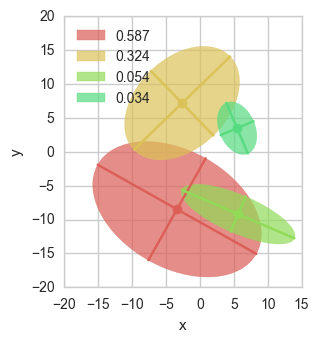

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.007      0.018  1.096506e-09      0.026       0.110

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.017  1.098811e-09      0.026       0.110

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.639  -4.135  -7.497  12.125  10.061  -0.332
2  0.260  -1.393   8.758   7.777   7.141   0.286
3  0.071   4.085  -8.790  10.090   5.416  -0.778
4  0.030   5.744   3.182   2.601   3.334  -0.187

GMM Plot Result
0.639119092745 [[-4.13545547 -7.49681263]] [  8.80881074  13.06362527] -120.264289274
0.259666351974 [[-1.39324714  8.75786539]] [ 6.25841988  8.50294624] -53.3166510608
0.0708075634032 [[ 4.08505085 -8.79007699]] [  3.11307834  11.02052689] -114.787615292
0.030406991878 [[ 5.74389285  3.18151886]] [ 2.49551208  3.41336767] -161.6781565


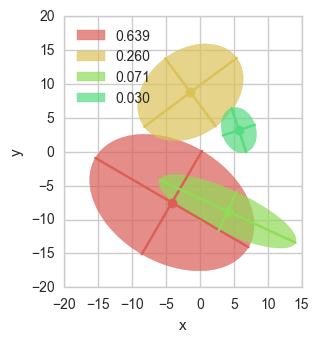

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.019  1.104332e-09      0.026       0.111

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.018  1.070618e-09      0.025       0.109

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.523  -3.293  -9.109  12.266  10.031  -0.395
2  0.363  -3.287   6.148   8.675   8.919   0.343
3  0.069   5.586  -9.392   8.974   4.447  -0.655
4  0.045   5.443   4.669   3.437   4.759  -0.440

GMM Plot Result
0.522778305032 [[-3.29319252 -9.10933397]] [  8.42218446  13.42177033] -121.428899338
0.362656145883 [[-3.28669367  6.14808525]] [  7.12489623  10.20037997] 137.313179878
0.0693824311489 [[ 5.58594643 -9.39169198]] [ 3.17304317  9.49916811] -110.359871444
0.045183117936 [[ 5.44253727  4.66863424]] [ 2.86766462  5.12178598] -153.485060054


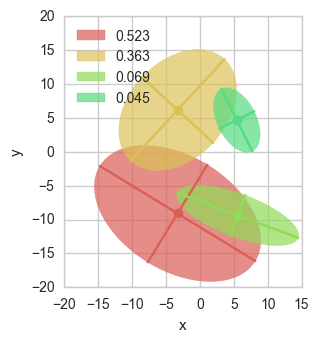

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.007      0.017  1.095612e-09      0.026       0.110

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.006      0.016  1.095727e-09      0.026       0.110

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.626  -4.048  -7.338  12.445  10.154  -0.305
2  0.268  -1.783   8.383   7.661   7.496   0.351
3  0.075   4.143  -8.892  10.189   5.333  -0.780
4  0.030   5.865   3.332   2.660   3.242  -0.127

GMM Plot Result
0.626320659398 [[-4.04836743 -7.33762511]] [  9.08456532  13.24549891] -118.069833738
0.268210360853 [[-1.78340343  8.38284629]] [ 6.10305738  8.81117352] -46.7674260573
0.0749918813869 [[ 4.14303502 -8.89176131]] [  3.07099057  11.08224984] -114.167907537
0.0304770983615 [[ 5.86502085  3.33225126]] [ 2.59920016  3.29093742] -163.672439391


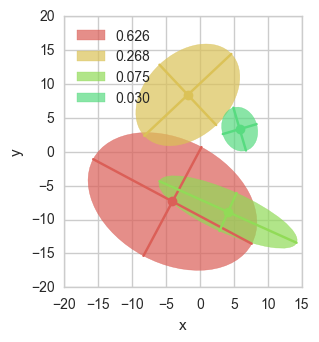

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.008      0.022  1.208721e-09      0.027       0.116

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.020  1.099195e-09      0.026       0.110

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.602  -3.853  -7.976  12.363  9.865  -0.322
2  0.288  -2.013   8.170   8.130  7.392   0.327
3  0.079   3.038  -8.430  10.100  4.968  -0.742
4  0.030   5.784   3.171   2.780  3.128  -0.068

GMM Plot Result
0.602014440891 [[-3.85259159 -7.97554647]] [  8.77582791  13.15848194] -117.354729822
0.288408311367 [[-2.01283527  8.17021955]] [ 6.31744586  8.99015063] -53.1254949293
0.0791760437849 [[ 3.03754561 -8.42968806]] [  3.107067    10.81854407] -111.965785865
0.0304012039572 [[ 5.78360651  3.17138883]] [ 2.75093222  3.15305886] -165.01691456


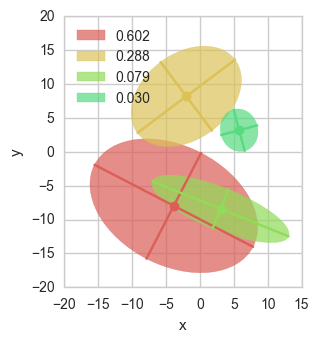

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.009      0.020  1.020560e-09      0.025       0.106

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.020  1.071435e-09      0.025       0.109

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.533  -3.159  -8.642  12.300  10.349  -0.374
2  0.345  -3.454   6.043   8.837   9.249   0.428
3  0.071   5.203  -9.536   8.491   4.416  -0.684
4  0.052   5.523   4.225   3.502   5.091  -0.449

GMM Plot Result
0.532651215341 [[-3.15924609 -8.64172659]] [  8.75637276  13.48022183] -122.560669019
0.344556844747 [[-3.45396558  6.04268971]] [  6.82655488  10.81792003] 138.032769194
0.0705665327188 [[ 5.20293205 -9.53558867]] [ 3.01088181  9.084328  ] -112.141675819
0.0522254071937 [[ 5.52250598  4.22519613]] [ 2.92695093  5.44176497] -155.212793414


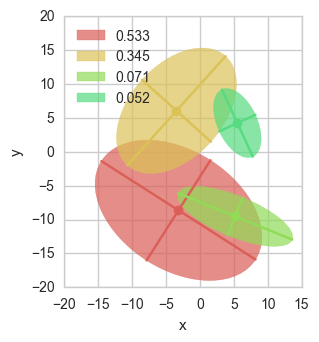

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.018  1.114337e-09      0.025       0.111

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.016  1.090436e-09      0.026       0.110

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.591  -3.859  -7.935  12.274  10.256  -0.338
2  0.298  -2.518   7.297   8.335   8.331   0.398
3  0.073   5.246  -9.444   8.924   5.063  -0.721
4  0.037   5.726   3.463   2.920   3.744  -0.252

GMM Plot Result
0.59098642771 [[-3.85884884 -7.93473172]] [  8.92640754  13.2726461 ] -120.938712472
0.298324313125 [[-2.51808938  7.29689886]] [ 6.46779192  9.85161334] -45.0335842532
0.0733520686495 [[ 5.24616115 -9.4436237 ]] [ 3.21547347  9.74352656] -115.159887997
0.0373371905149 [[ 5.72562967  3.46252937]] [ 2.71711657  3.89302273] -157.46999979


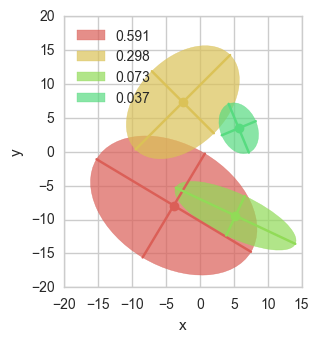

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.007      0.016  1.071048e-09      0.025       0.109

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.016  1.096171e-09      0.026       0.110

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.562  -3.746  -8.310  12.141  10.121  -0.330
2  0.317  -3.430   6.770   8.489   8.819   0.417
3  0.070   6.029  -9.660   8.008   4.603  -0.645
4  0.051   5.436   4.440   3.400   4.881  -0.402

GMM Plot Result
0.561834977058 [[-3.7458261  -8.30990819]] [  8.86114998  13.08925537] -120.506566458
0.316932055607 [[-3.42957922  6.76953039]] [  6.60061767  10.30849098] 137.618894119
0.0698965485605 [[ 6.02939165 -9.66033222]] [ 3.25846079  8.64244807] -113.960084286
0.051336418775 [[ 5.43562258  4.43996121]] [ 2.93814847  5.17251675] -156.288889157


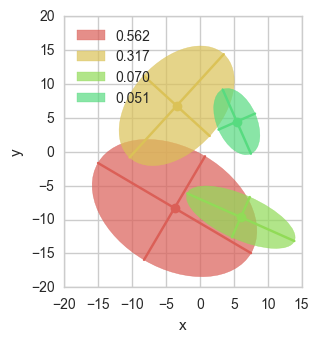

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.007      0.019  1.004982e-09      0.026       0.106

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.018  1.095779e-09      0.026       0.110

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.605  -3.686  -8.180  12.339  10.023  -0.344
2  0.296  -2.378   7.896   8.344   7.881   0.393
3  0.063   4.297  -8.680   8.957   4.737  -0.753
4  0.036   5.808   3.411   2.814   3.390  -0.149

GMM Plot Result
0.604716571354 [[-3.68615145 -8.17995705]] [  8.74974675  13.27297142] -119.335530607
0.296108325273 [[-2.37759258  7.89556666]] [ 6.30682546  9.58899126] -49.1421363137
0.0632663356177 [[ 4.29693195 -8.67966609]] [ 2.87458737  9.7165875 ] -113.935327634
0.0359087677556 [[ 5.80763823  3.41082594]] [ 2.72452467  3.46196004] -160.770794734


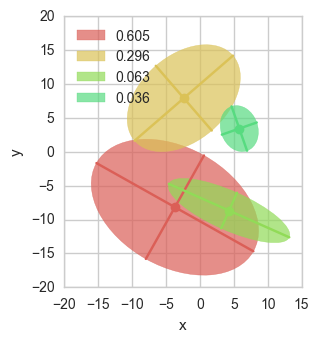

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.007      0.021  1.064487e-09      0.026       0.109

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.018  1.081415e-09      0.026       0.110

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.544  -3.609  -8.720  12.507  9.910  -0.361
2  0.345  -2.755   6.814   8.458  8.492   0.331
3  0.074   4.239  -8.896   8.790  4.590  -0.689
4  0.036   5.655   3.422   2.928  4.037  -0.341

GMM Plot Result
0.544370750421 [[-3.60928136 -8.72031615]] [  8.60043231  13.44092981] -118.469851404
0.345488554662 [[-2.7550039   6.81374633]] [ 6.93182164  9.7780525 ] 135.350697837
0.0744528868503 [[ 4.23866669 -8.89586969]] [ 3.10568952  9.41775213] -112.345720297
0.0356878080661 [[ 5.65524398  3.42242784]] [ 2.61806362  4.24466264] -156.882615284


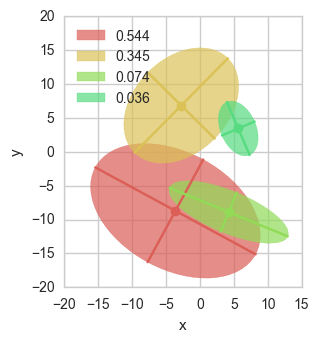

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.007      0.019  1.193858e-09      0.026       0.115

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.017  1.086037e-09      0.026       0.110


Wall time: 5min 59s


In [111]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
#     fig_gmm = plt.figure(figsize=(4,3))
#     mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(result['gmm'])
#     pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)
#     plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
#     align_figures()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [69]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.078257  0.020848  8.437707e-09    0.070759     0.305955  0.921875
1    0.074532  0.020959  8.336679e-09    0.070059     0.304440  0.923484
2    0.077032  0.021261  8.310852e-09    0.073072     0.303619  0.922775
3    0.076632  0.020982  8.192383e-09    0.069317     0.301774  0.924691

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.075213  0.021101  8.469340e-09    0.072515     0.307130  0.922829
1    0.087801  0.021262  8.446198e-09    0.073489     0.305737  0.920876
2    0.081004  0.026677  9.181056e-09    0.067814     0.319863  0.917318
3    0.081546  0.026430  9.068145e-09    0.076225     0.316856  0.915694

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.033710  0.011634  2.739848e-09    0.040155     0.174344  0.974841
1    0.032096  0.011404  2.811393e-09    0.041716     0.176653  0.973947
2    0.036005  0.010794  2.714422e-09    0.040640     0.173644  0.975170
3    0.033577  0.011529  2.756160e-09    0.040261     0.175049  0.974297

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.046127  0.015410  3.426619e-09    0.045603     0.195361  0.968009
1    0.045389  0.019145  3.148368e-09    0.041658     0.187109  0.971398
2    0.034653  0.010074  3.277069e-09    0.042926     0.190683  0.968996
3    0.039872  0.014507  3.439528e-09    0.044967     0.195100  0.969353

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.056454  0.014862  2.022546e-09    0.035314     0.149833  0.981384
1    0.069518  0.014973  2.139317e-09    0.036188     0.154184  0.980159
2    0.024534  0.008659  2.174723e-09    0.035778     0.155431  0.980033
3    0.079091  0.015448  2.058104e-09    0.034833     0.151137  0.980936

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.047737  0.018691  2.806595e-09    0.039668     0.176663  0.973948
1    0.057111  0.013316  2.446685e-09    0.037117     0.164672  0.977801
2    0.034063  0.010566  2.745822e-09    0.041261     0.174527  0.974340
3    0.130951  0.024651  2.873327e-09    0.042356     0.178777  0.973864

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.021360  0.007223  1.152327e-09    0.026233     0.113086  0.989351
1    0.017594  0.007604  9.906771e-10    0.024385     0.104889  0.990817
2    0.018659  0.008680  1.042663e-09    0.025062     0.107566  0.990409
3    0.017012  0.007263  1.036607e-09    0.025106     0.107363  0.990449

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.020137  0.007399  1.304371e-09    0.027955     0.120468  0.988042
1    0.028022  0.010643  1.755022e-09    0.032293     0.139601  0.984054
2    0.024831  0.009465  1.737097e-09    0.032362     0.139040  0.983870
3    0.024628  0.009226  1.465312e-09    0.029283     0.127307  0.986430

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.013805  0.010263  7.826172e-10    0.021667     0.093252  0.992738
1    0.014370  0.009747  7.405879e-10    0.021046     0.090693  0.993179
2    0.013097  0.008619  7.000457e-10    0.020617     0.088138  0.993546
3    0.013687  0.007929  7.092596e-10    0.020714     0.088750  0.993464

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017312  0.013658  1.071665e-09    0.025498     0.108997  0.990284
1    0.021320  0.010531  1.218459e-09    0.027192     0.116301  0.988719
2    0.018513  0.009882  1.441096e-09    0.029226     0.126644  0.986705
3    0.023736  0.009279  1.372847e-09    0.028099     0.123464  0.987303

Wall time: 10min 49s


In [70]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.076613  0.021013  8.319405e-09    0.070802     0.303947  0.923207
2    0.033847  0.011340  2.755456e-09    0.040693     0.174923  0.974564
3    0.057399  0.013486  2.098672e-09    0.035528     0.152646  0.980628
4    0.018656  0.007693  1.055569e-09    0.025196     0.108226  0.990256
5    0.013740  0.009139  7.331276e-10    0.021011     0.090208  0.993232

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.081391  0.023867  8.791185e-09    0.072511     0.312397  0.919179
2    0.041510  0.014784  3.322896e-09    0.043788     0.192063  0.969439
3    0.067465  0.016806  2.718107e-09    0.040101     0.173660  0.974988
4    0.024405  0.009183  1.565451e-09    0.030474     0.131604  0.985599
5    0.020220  0.010837  1.276017e-09    0.027504     0.118852  0.988253

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


R_square


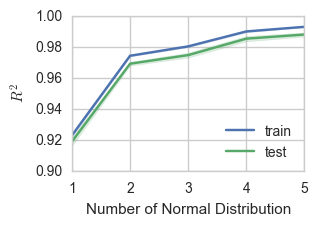

K_S


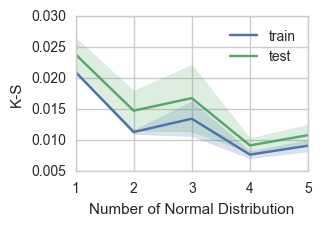

Chi_square


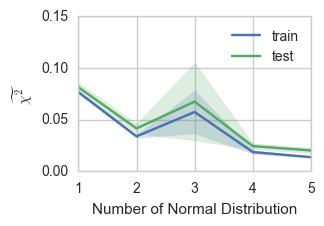

In [71]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

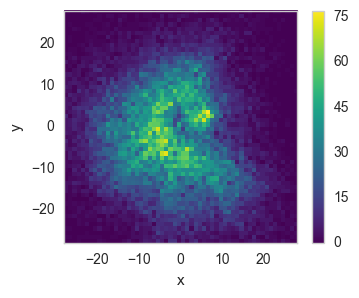

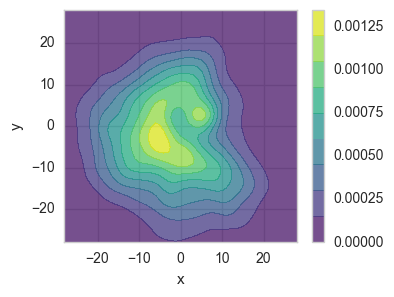

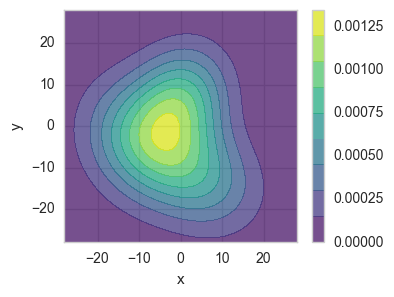

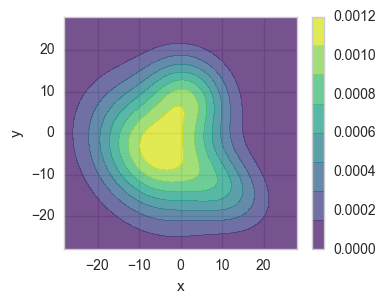

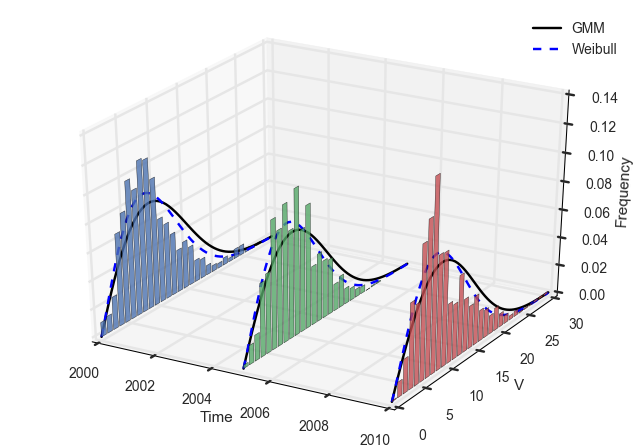

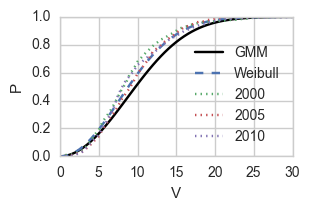

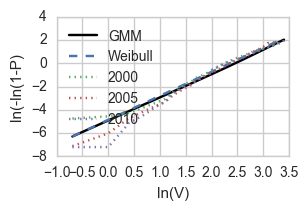

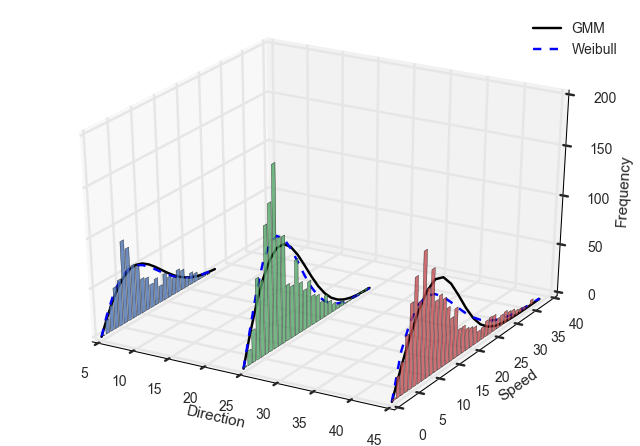

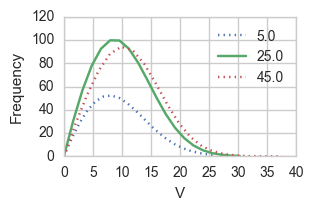

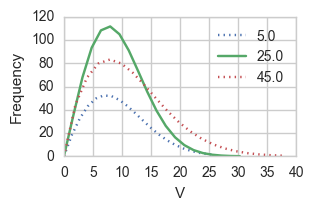

In [72]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [73]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)